> بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ<small>  
Bismillāh ir-raḥmān ir-raḥīm

In the name of God, the Most Gracious, the Most Merciful  
Em nome de Deus, o Clemente, o Misericordioso</small>

# Project Overview

## The Problem

The company `Telecom X` has been facing a high ammount of `churn`, which turned out to be an alarming factor for the company's financial and marketing sectors. This Data Analytics and Data Science project aims to provide tools for Telecom X to better understand their churning customers' profile and predict churn possibility red-flags in the current customers.

## The Strategy

The project aims at providing 2 solutions, one more heuristically oriented and other more deterministically oriented.
1. Provide a comprehensive data analysis to bring about insights on which variables are more determinants to lead customers to churn.

2. Provide 2 predictive models, ready to use and able to:
    - Predict wether customers are propense to churn or not.
    - Predict how likely the customer is to churn in %

## Outputs

1. Key `insights` from data analytics about how variables influence churn.

2. `Models` ready to be used for future cases.  
    - Risk classifying
    - Probability estimation
3. `Predictions` on the current customer data from both models.
4. A `combined prediction` based on the relation of the previously mentioned 2 predictions.

# Imports

In [3]:
# #
# Imports
import re
import pickle
import numpy as np
import pandas as pd
from pprint import pprint
from typing import Dict, List, Tuple, Literal, Optional
from utils import (explore_distribution, plot_feature, plot_correlation, plot_confusion_matrix,
                        label_plot, get_feature_importances, get_feature_permutation_importances,
                        get_feature_importances_summary, get_permutation_importances_summary, FeatureDropCandidates, plt_show_close, document_model)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_auc_score
)

# Main Code

## Loading the Dataframe

The original dataframe will be saved for churn predictions.

In [4]:
df_original = pd.read_csv('TelecomX_Data_Transformed.csv')
df = df_original.drop(columns=['CustomerID', 'Demographics']) # Dropping unnecessary features
df.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Mensal,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fibra Ótica,No,...,Yes,No,No,No,Mensal,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fibra Ótica,No,...,Yes,No,Yes,Yes,Mensal,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fibra Ótica,No,...,No,Yes,Yes,No,Mensal,Yes,Mailed check,83.9,267.40,2.796667


## Exploratory Data Analysis

### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   Gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   object 
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   Tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


### Define X and Y

In [6]:
x = df.drop(columns=['Churn'])
y = df['Churn']

### Target Variable (Y)

------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB
------------------------------


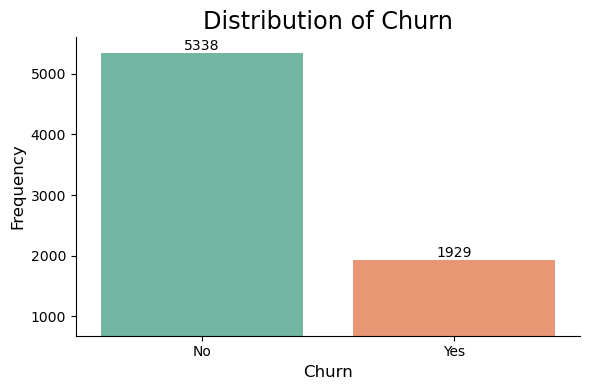

In [7]:
y.value_counts()
print('-' * 30)
y.info()
print('-' * 30)
plot_feature(df, 'Churn')

### Features (X)

Graphical exploratory analysis of each candidate feature in the dataset.

#### Continous

##### Tenure

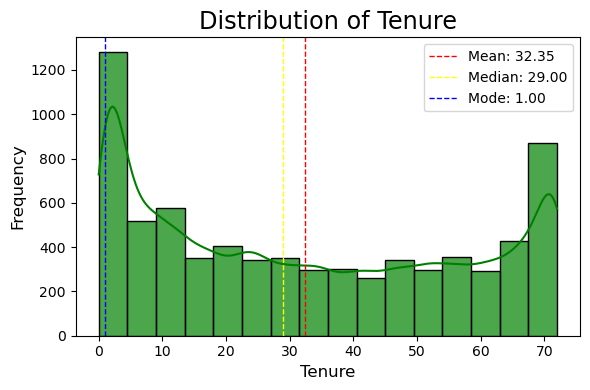

In [8]:
plot_feature(df, 'Tenure')

##### Daily

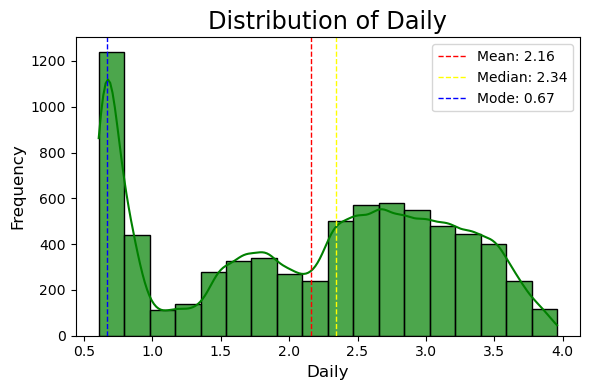

In [9]:
plot_feature(df, 'Daily')

##### Monthly

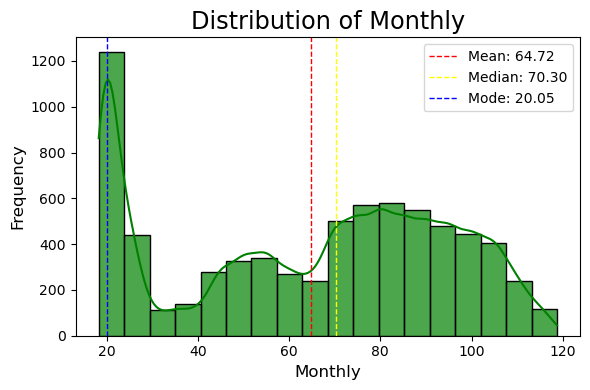

In [10]:
plot_feature(df, 'Monthly')

##### Total

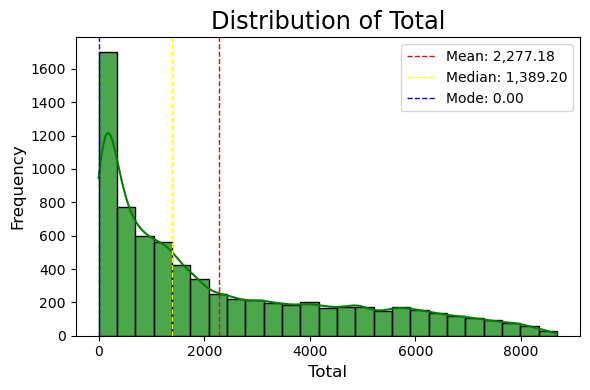

In [11]:
plot_feature(df, 'Total')

#### Categoricals

##### Gender

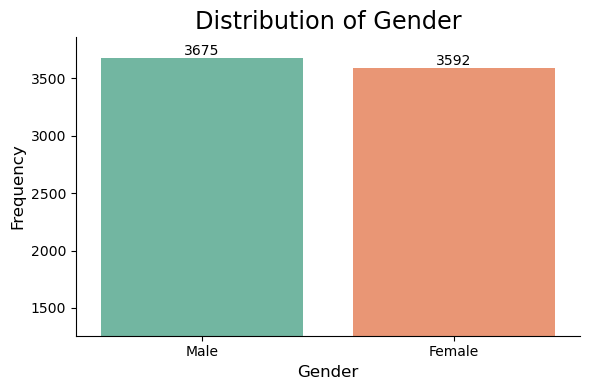

In [12]:
plot_feature(df, 'Gender')

##### SeniorCitizen

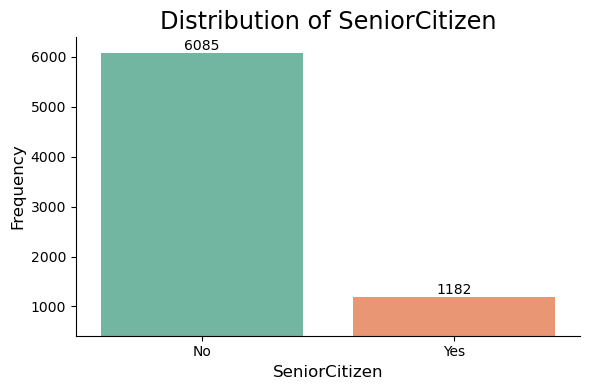

In [13]:
plot_feature(df, 'SeniorCitizen')

##### Partner

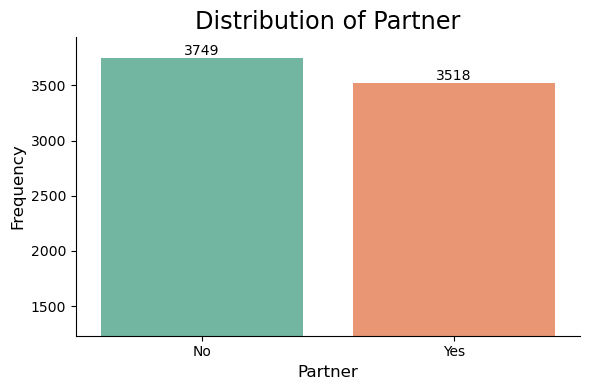

In [14]:
plot_feature(df, 'Partner')

##### Dependents

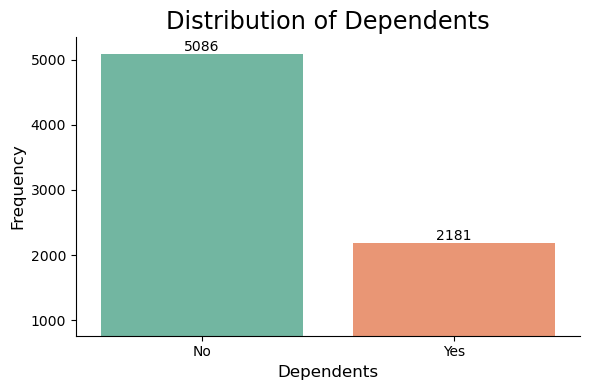

In [15]:
plot_feature(df, 'Dependents')

##### PhoneService

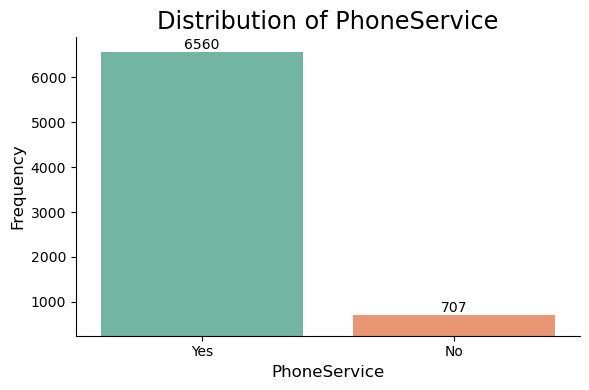

In [16]:
plot_feature(df, 'PhoneService')

##### MultipleLines

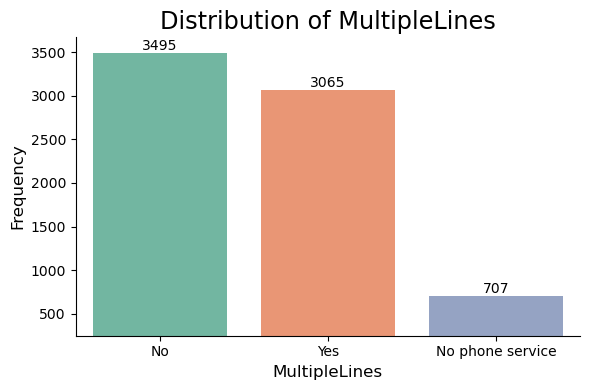

In [17]:
plot_feature(df, 'MultipleLines')

##### InternetService

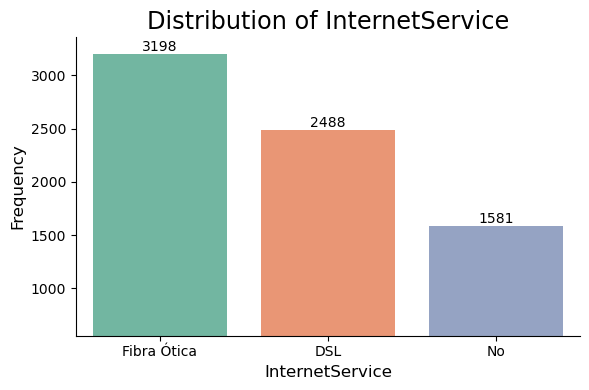

In [18]:
plot_feature(df, 'InternetService')

##### OnlineSecurity

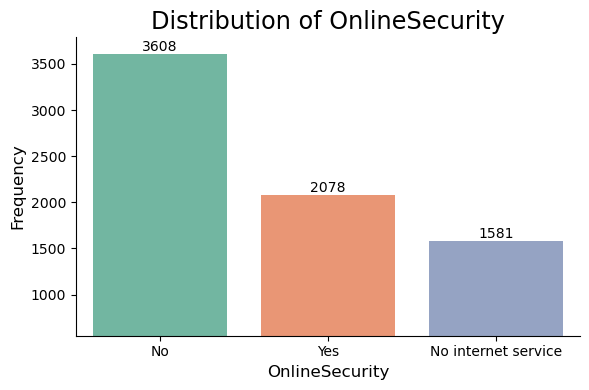

In [19]:
plot_feature(df, 'OnlineSecurity')

##### OnlineBackup

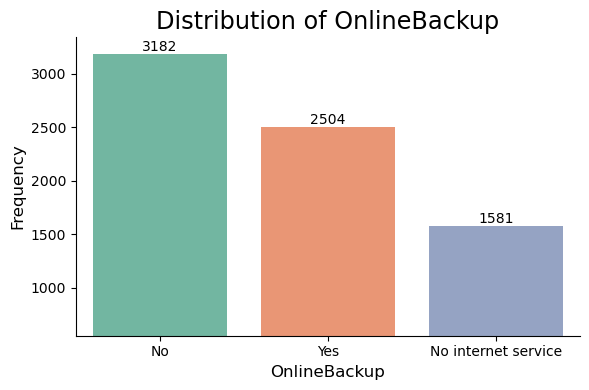

In [20]:
plot_feature(df, 'OnlineBackup')

##### DeviceProtection

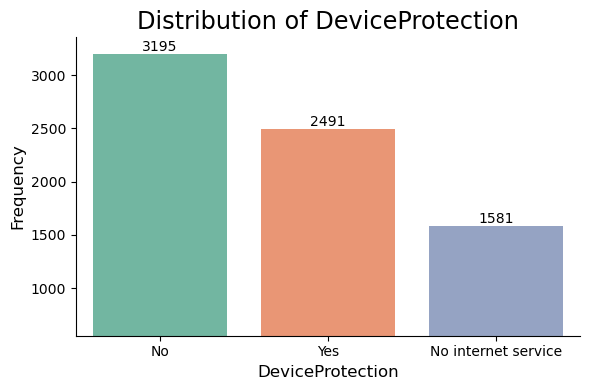

In [21]:
plot_feature(df, 'DeviceProtection')

##### TechSupport

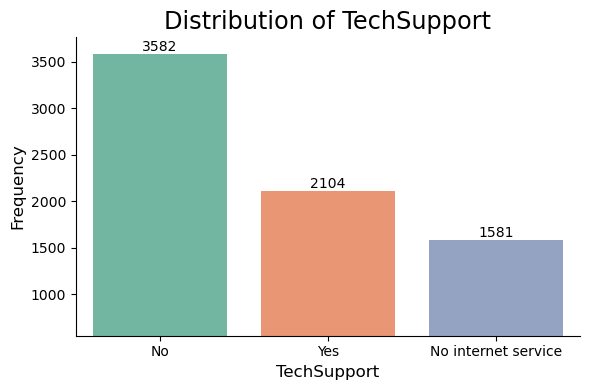

In [22]:
plot_feature(df, 'TechSupport')

##### StreamingTV

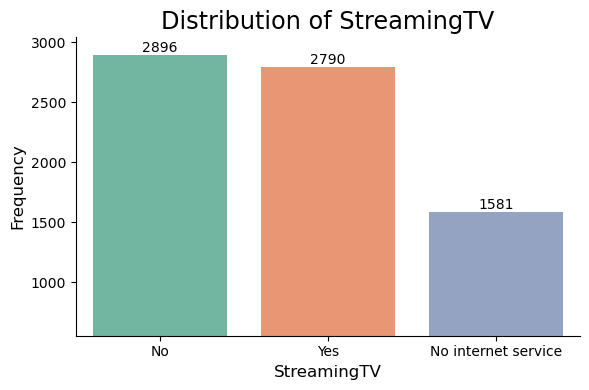

In [23]:
plot_feature(df, 'StreamingTV')

##### StreamingMovies

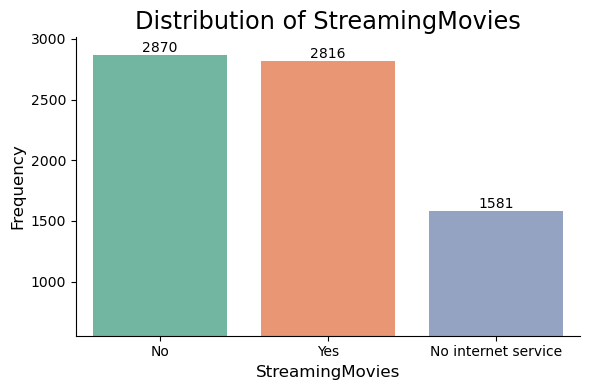

In [24]:
plot_feature(df, 'StreamingMovies')

##### Contract

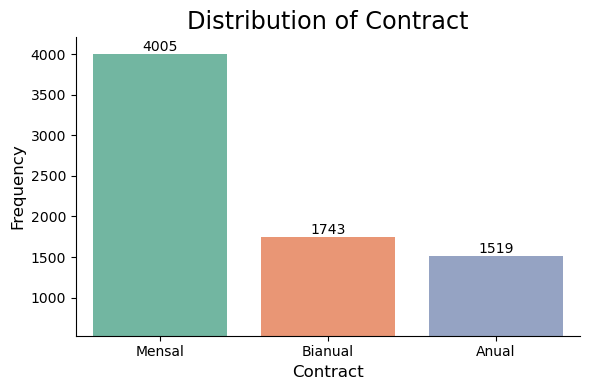

In [25]:
plot_feature(df, 'Contract')

##### PaperlessBilling

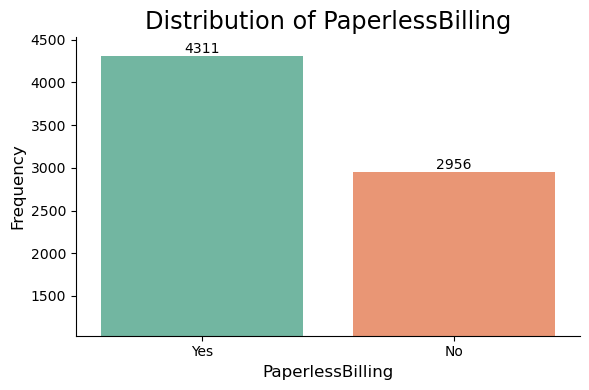

In [26]:
plot_feature(df, 'PaperlessBilling')

##### PaymentMethod

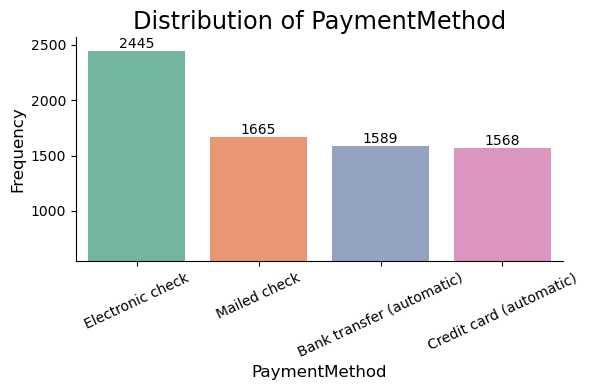

In [27]:
plot_feature(df, 'PaymentMethod')

## Data Preprocessing

### Continous features

Studying continous features `['Monthly', 'Daily', 'Total', 'Tenure']`

#### Correlations

Analysing the correlation between the continous features

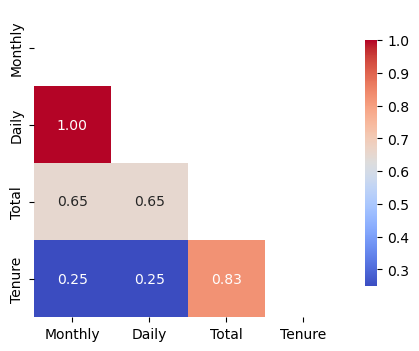

In [28]:
plot_correlation(x, ['Monthly', 'Daily', 'Total', 'Tenure'])

> 1. As expected, 'Daily' feature and 'Monthly' feature correlation is 1, which means they have perfect positive correlation. I happens because Daily = Monthly / 30.  
Monthly shall be dropped

> 2. Tenure and total presents multicollinearity, as Monthly × Tenure ≈ Total.  
Total shall also be dropped.

##### Drop daily

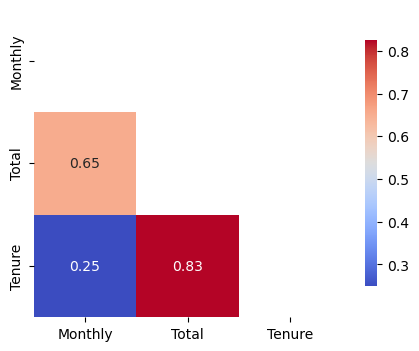

In [29]:
x.drop(columns=['Daily'], inplace=True)
plot_correlation(x, ['Monthly', 'Total', 'Tenure'])

##### Drop total

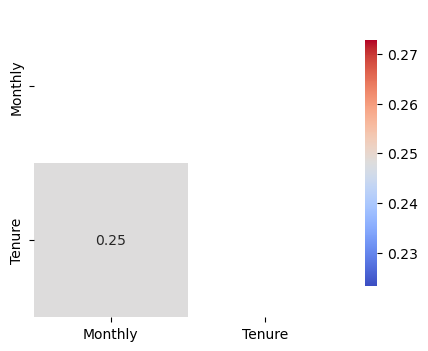

In [30]:
x.drop(columns=['Total'], inplace=True)
plot_correlation(x, ['Monthly', 'Tenure'])

#### Distributions

In [31]:
x.describe()

,Tenure,Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


##### Monthly

=> Exploration of Monthly:

Monthly
20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.216539
kurtosis   -1.261512
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Monthly, dtype: float64
------------------------------


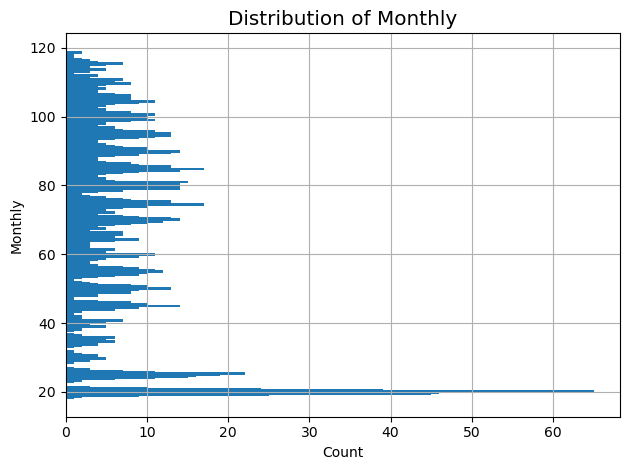

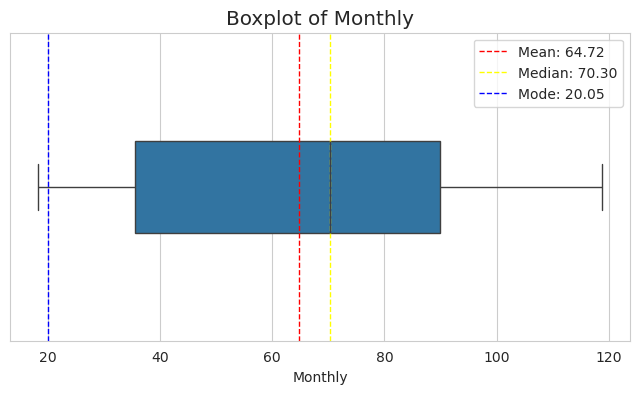

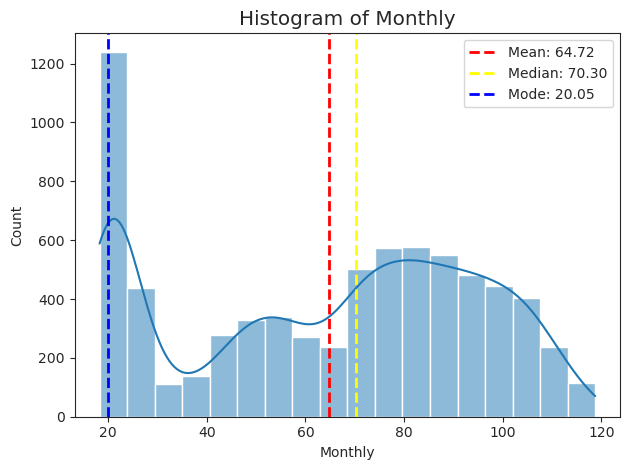

In [32]:
explore_distribution(x, 'Monthly')

##### Tenure

=> Exploration of Tenure:

Tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    0.239523
kurtosis   -1.388981
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64
------------------------------


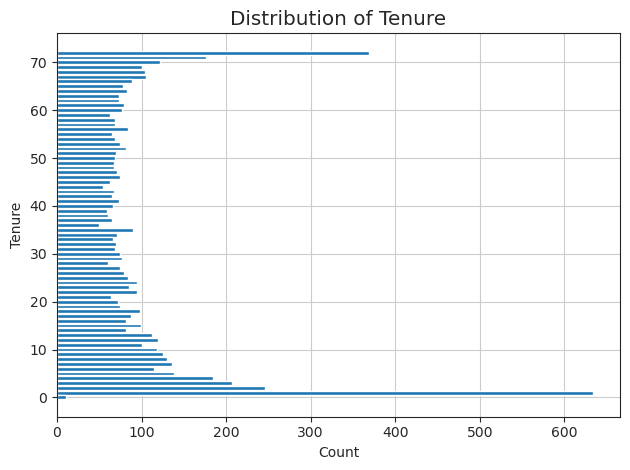

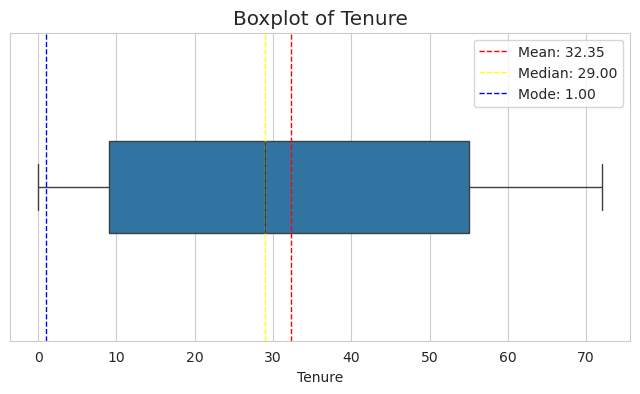

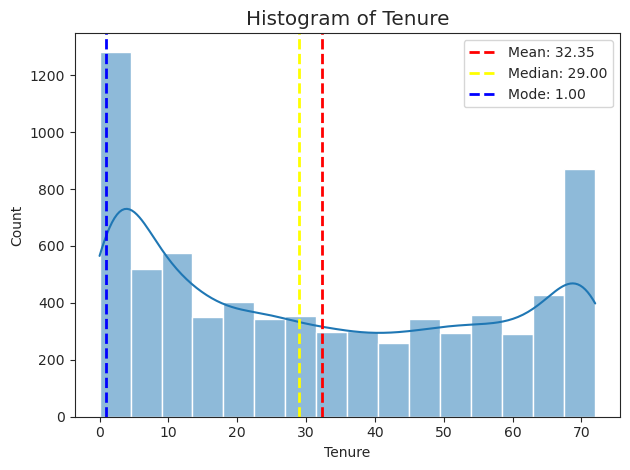

In [33]:
explore_distribution(x, 'Tenure')

#### Considerations

1. The continous features are right-skewed and uneven.

2. A logarithmic column will be set up in seek to reach lesser values for skewness and kurtosis and check possibilities.
3. The possibility of binning is not fit for `Monthly` due to the length of unique values, but may be a good strategy for `Tenure`

#### Logarithm columns setup

In [34]:
def generate_log_features(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    df[f'log_{feature}'] = np.log1p(df[feature])
    return df

In [35]:
x = generate_log_features(x, 'Monthly')
x = generate_log_features(x, 'Tenure')
x[['Monthly', 'log_Monthly', 'Tenure', 'log_Tenure']].head(2)

,Monthly,log_Monthly,Tenure,log_Tenure
0,65.6,4.198705,9,2.302585
1,59.9,4.109233,9,2.302585


=> Exploration of log_Monthly:

log_Monthly
3.046901    65
3.037354    46
3.039749    46
3.030134    45
3.022861    45
            ..
3.196630     1
4.766864     1
4.680741     1
4.242046     1
4.231930     1
Name: count, Length: 1585, dtype: int64
------------------------------
Info:

skewness    -0.714302
kurtosis   -0.974319
count    7267.000000
mean        4.042297
std         0.580969
min         2.957511
25%         3.595255
50%         4.266896
75%         4.509485
max         4.785406
Name: log_Monthly, dtype: float64
------------------------------


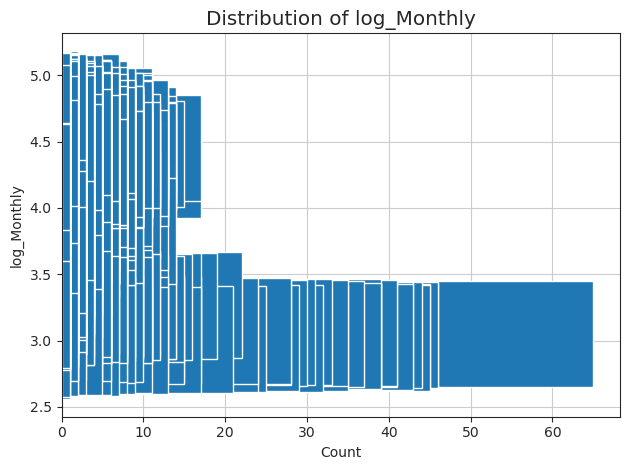

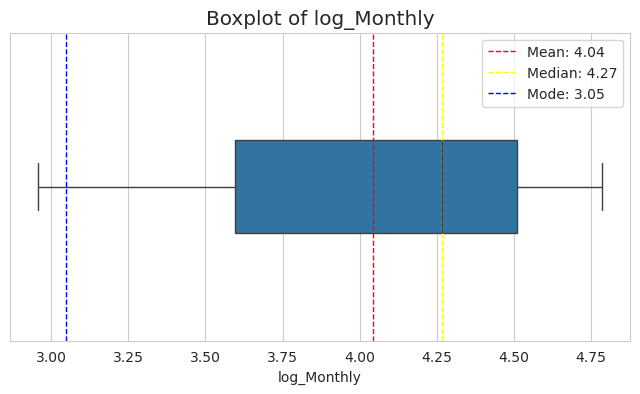

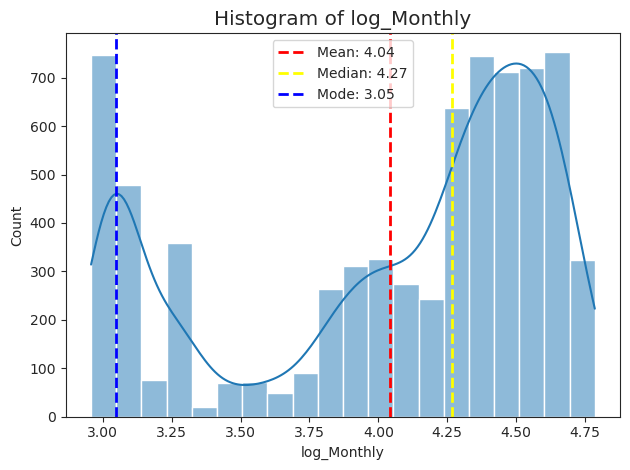

In [36]:
explore_distribution(x, 'log_Monthly')

=> Exploration of log_Tenure:

log_Tenure
0.693147    634
4.290459    369
1.098612    246
1.386294    207
1.609438    185
           ... 
3.663562     60
3.688879     59
3.806662     54
3.610918     50
0.000000     11
Name: count, Length: 73, dtype: int64
------------------------------
Info:

skewness    -0.773836
kurtosis   -0.645068
count    7267.000000
mean        3.034902
std         1.156684
min         0.000000
25%         2.302585
50%         3.401197
75%         4.025352
max         4.290459
Name: log_Tenure, dtype: float64
------------------------------


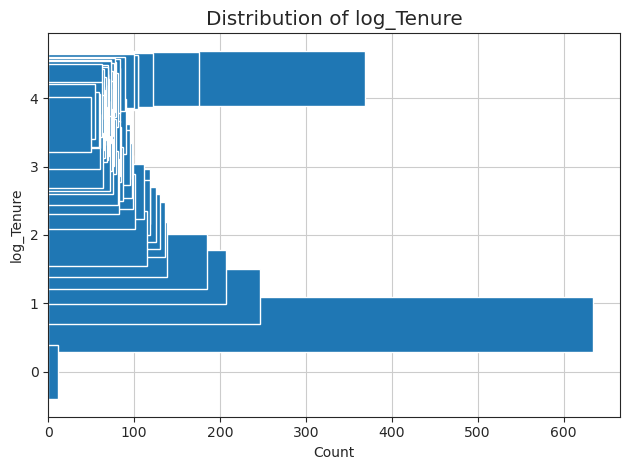

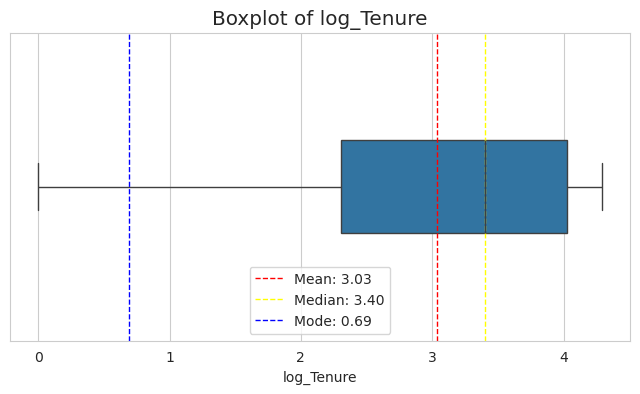

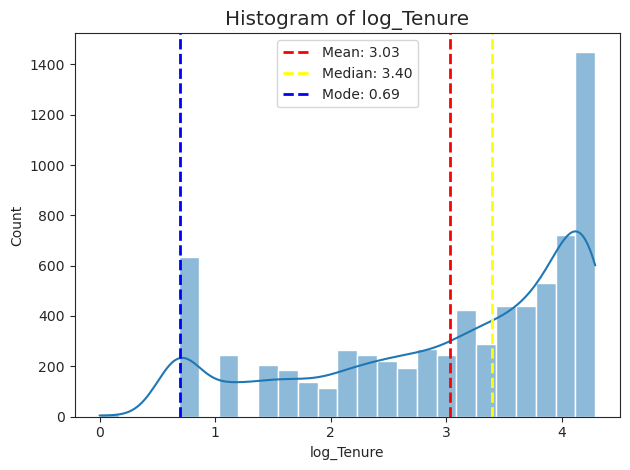

In [37]:
explore_distribution(x, 'log_Tenure')

#### Considerations

1. Log transformed data reached lesser values for kurtosis, but bigger values for skewness.

2. Transformed columns will be kept as extra possibilities for experimentation.

#### Tenure: Test binning strategies

Testing binning approaches for `Tenure`:
> "Tenure" feature is composed of continous unique values in the range of 0 to 72 months. Hence, a good candidate for binning. This section will explore the best approach, if any, for binning this feature.

##### Binning

In [38]:
def categorize_tenure(df: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]:
    """
    Categorize the 'Tenure' feature into different groups using two approaches.

    The first approach divides the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years.
    The second approach divides the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years.
    The third approach uses quantiles to divide the tenure into four groups.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the 'Tenure' column to be categorized.

    Returns
    -------
    Tuple[pd.DataFrame, Dict[int, str], Dict[int, str], Dict[int, str]]
        Modified DataFrame with 'TenureGroup1', 'TenureGroup2' and 'TenureGroupQuantile' columns,
        and three dictionaries for mapping the group codes to descriptive strings.
    """

    # Approach 1
    # Divide the tenure into four groups: < 1 year, 1 - 3 years, 3 - 5 years and > 5 years
    bins1: List[int] = [0, 12, 36, 60, 72]
    labels1: List[int] = [0, 1, 2, 3]
    df['TenureGroup1'] = pd.cut(df['Tenure'], bins=bins1, labels=labels1, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group1_mapping: Dict[int, str] = {
        0: '< 1 year',
        1: '1 - 3 years',
        2: '3 - 5 years',
        3: '> 5 years'
    }

    # Approach 2
    # Divide the tenure into four groups: < 6 months, 6 months - 2 years, 2 - 4 years and > 4 years
    bins2: List[int] = [0, 6, 24, 48, 72]
    labels2: List[int] = [0, 1, 2, 3]
    df['TenureGroup2'] = pd.cut(df['Tenure'], bins=bins2, labels=labels2, right=True).astype(float)

    # Mapping for group codes to descriptive strings
    tenure_group2_mapping: Dict[int, str] = {
        0: '< 6 months',
        1: '6 months - 2 years',
        2: '2 - 4 years',
        3: '> 4 years'
    }

    # Approach 3
    # Divide the tenure into four groups using quantiles
    df['TenureGroupQuantile'] = pd.qcut(df['Tenure'], q=4, labels=False)

    # Mapping for group codes to descriptive strings
    tenure_group_quantile_mapping: Dict[int, str] = {
        0: '1st quartile (lowest 25%)',
        1: '2nd quartile (25%-50%)',
        2: '3rd quartile (50%-75%)',
        3: '4th quartile (highest 25%)'
    }

    return df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping

In [39]:
df, tenure_group1_mapping, tenure_group2_mapping, tenure_group_quantile_mapping = categorize_tenure(df)

##### Testing

=> Exploration of TenureGroup1:

TenureGroup1
0.0    2254
1.0    1908
2.0    1643
3.0    1451
Name: count, dtype: int64
------------------------------
Info:

skewness    0.226847
kurtosis   -1.306616
count    7256.000000
mean        1.315739
std         1.112404
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroup1, dtype: float64
------------------------------


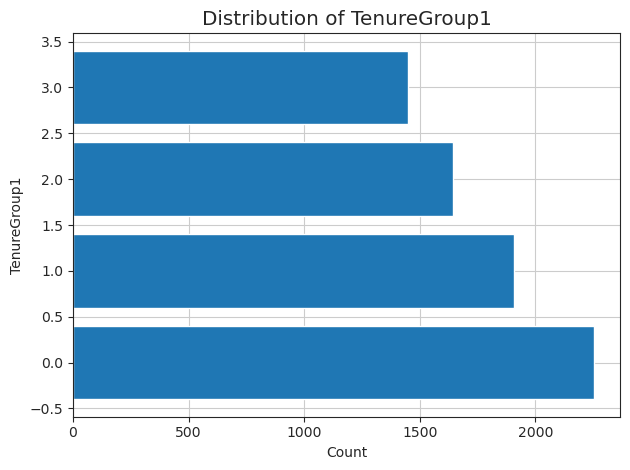

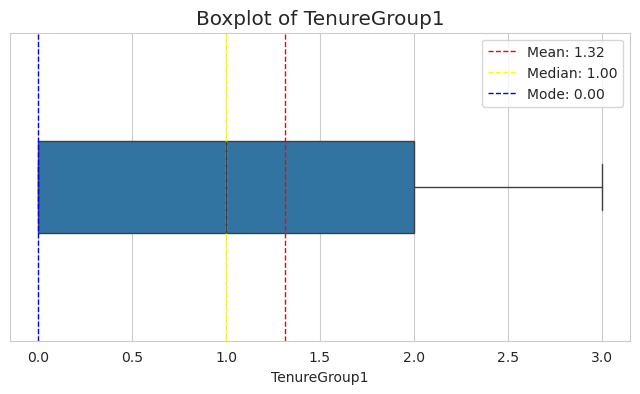

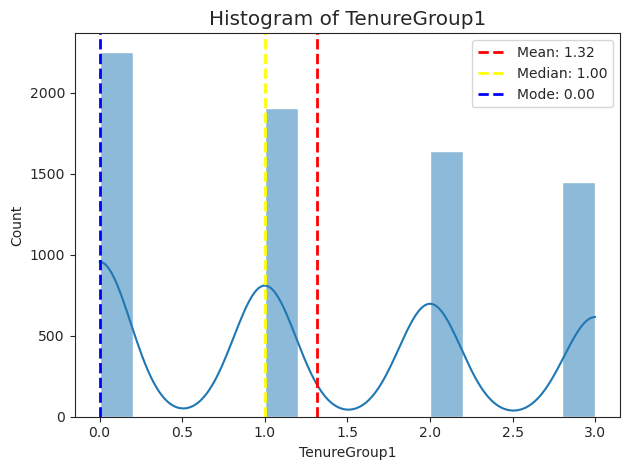

=> Exploration of TenureGroup2:

TenureGroup2
3.0    2309
1.0    1774
2.0    1648
0.0    1525
Name: count, dtype: int64
------------------------------
Info:

skewness    -0.159375
kurtosis   -1.381858
count    7256.000000
mean        1.653390
std         1.132885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: TenureGroup2, dtype: float64
------------------------------


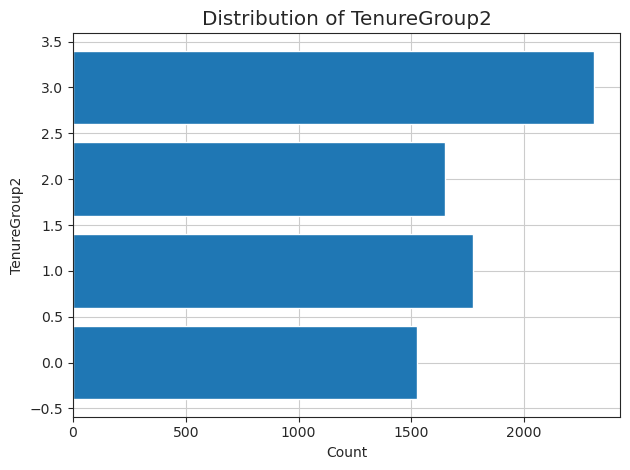

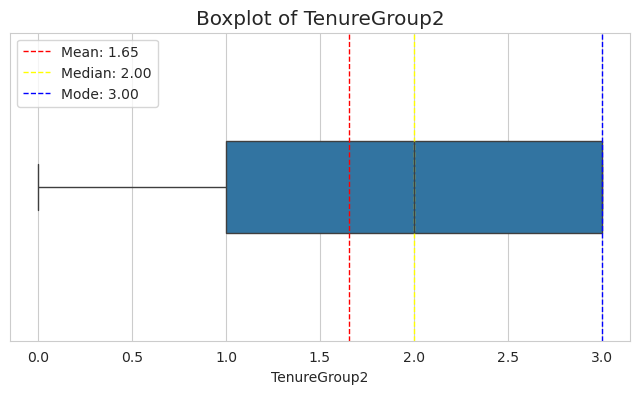

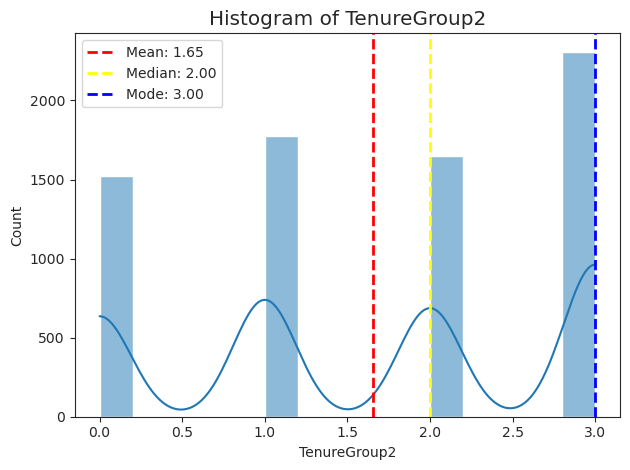

=> Exploration of TenureGroupQuantile:

TenureGroupQuantile
0    1927
3    1813
2    1770
1    1757
Name: count, dtype: int64
------------------------------
Info:

skewness    0.023608
kurtosis   -1.388869
count    7267.000000
mean        1.477363
std         1.130917
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TenureGroupQuantile, dtype: float64
------------------------------


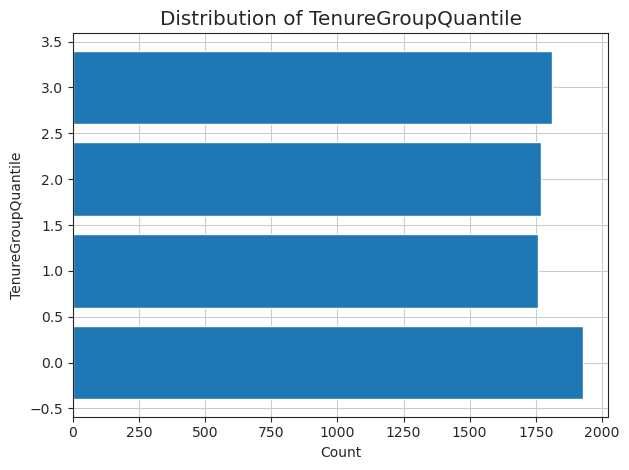

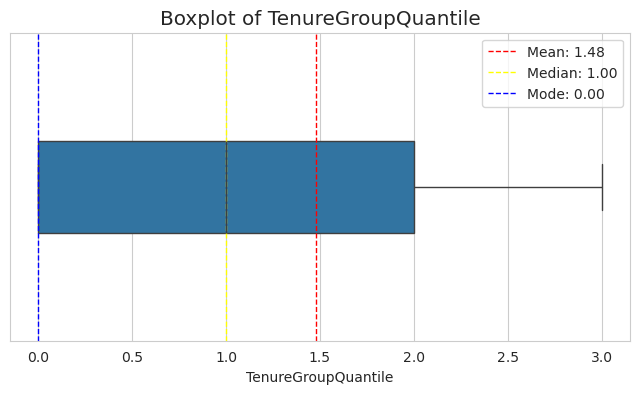

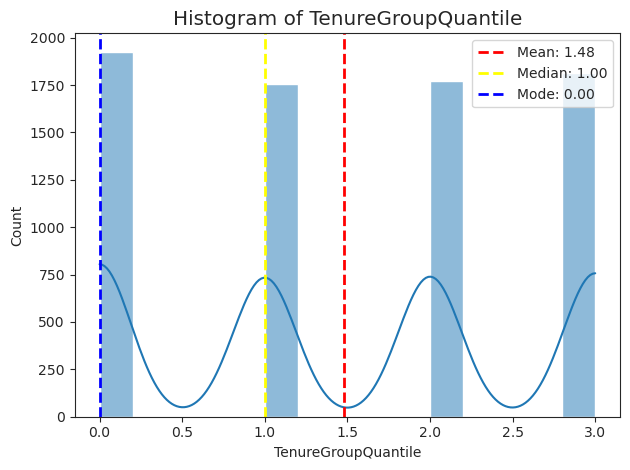

In [40]:
explore_distribution(df, 'TenureGroup1')
explore_distribution(df, 'TenureGroup2')
explore_distribution(df, 'TenureGroupQuantile')

#### Considerations

1. The `Tenure` is right-skewed distributed with an explosion for values >= 70 months.

2. All the approaches were unfair with the original data distribution, leading to loss of important information.
3. The most conservative approach of keeping the original data distribution was selected for Tree Models.
Values will be scaled alongside with the continous feature `Monthly`.

#### Scaling

Scaling continous features for Tree Models

In [41]:
scaler = MinMaxScaler()
x[['Monthly', 'Tenure']] = scaler.fit_transform(df[['Monthly', 'Tenure']])
print(x[['Monthly', 'Tenure']])

       Monthly    Tenure
0     0.471144  0.125000
1     0.414428  0.125000
2     0.553731  0.055556
3     0.793532  0.180556
4     0.653234  0.041667
...        ...       ...
7262  0.367164  0.180556
7263  0.665174  0.305556
7264  0.318905  0.027778
7265  0.493532  0.930556
7266  0.405473  0.875000

[7267 rows x 2 columns]


### Categoricals

Studying categorical features

In [42]:
categorical_features = [item for item in x.columns if x[item].dtype == 'O']
print(categorical_features)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### Binary features

In [43]:
binary_features = [item for item in categorical_features if x[item].nunique() == 2]
binary_features.remove('Gender')
print(binary_features)

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [44]:
x[binary_features] = x[binary_features].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
x.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,log_Monthly,log_Tenure
0,Female,0,1,1,0.125,1,No,DSL,No,Yes,No,Yes,Yes,No,Anual,1,Mailed check,0.471144,4.198705,2.302585
1,Male,0,0,0,0.125,1,Yes,DSL,No,No,No,No,No,Yes,Mensal,0,Mailed check,0.414428,4.109233,2.302585


#### Non binary features

In [45]:
non_binary_features = [item for item in categorical_features if item not in binary_features]
print(non_binary_features)

['Gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


### Encoding

#### OneHot Encoding X

In [46]:
# Encode non_binary_features using OneHotEncoder and make_column_transformer
ct = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), non_binary_features),
    remainder='passthrough'
)

x = ct.fit_transform(x)
x = pd.DataFrame(x, columns=ct.get_feature_names_out()) # type: ignore
x.head(2)

,onehotencoder__Gender_Male,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fibra Ótica,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__Tenure,remainder__PhoneService,remainder__PaperlessBilling,remainder__Monthly,remainder__log_Monthly,remainder__log_Tenure
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.125,1.0,1.0,0.471144,4.198705,2.302585
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.125,1.0,0.0,0.414428,4.109233,2.302585


#### Label encoding Y

In [47]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y).astype('float64') # type: ignore
print(y)

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7262    0.0
7263    1.0
7264    0.0
7265    0.0
7266    0.0
Length: 7267, dtype: float64


### Dropping redundant features

Some features are redundant when considered in the context.  
- The information 'no phone service' is already at 'remainder__PhoneService'
- The information 'no internet service' is already at 'InternetService_No'

#### Columns

In [48]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_No
MultipleLines_No phone service
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


#### Dropping

In [49]:
print(f'Length before dropping: {x.shape[1]}')

for column_name in column_names:
    if re.search('_No internet service', column_name) or re.search('_No phone service', column_name):
        x.drop(columns=[f'onehotencoder__{column_name}'], inplace=True) # type: ignore
        
print(f'Length after dropping: {x.shape[1]}')

Length before dropping: 41
Length after dropping: 34


In [50]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_No
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_No
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_Yes
TechSupport_No
TechSupport_Yes
StreamingTV_No
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


For the variables which was non binary due to the present of 'No phone service' and 'No internet service', it has kept the redundant information of a column for 'No' and other for 'Yes'.

Dropping all negative ('No') features with the exception of `'onehotencoder__InternetService_No'`:

In [51]:
print(f'Length before dropping: {x.shape[1]}')

for column_name in column_names:
    if re.search('_No', column_name) and column_name != 'InternetService_No':
        x.drop(columns=[f'onehotencoder__{column_name}'], inplace=True) # type: ignore
        
print(f'Length after dropping: {x.shape[1]}')

Length before dropping: 34
Length after dropping: 27


In [52]:
column_names = [column.replace('onehotencoder__', '') for column in x.columns] # type: ignore
for column_name in column_names:
    print(column_name)

Gender_Male
MultipleLines_Yes
InternetService_DSL
InternetService_Fibra Ótica
InternetService_No
OnlineSecurity_Yes
OnlineBackup_Yes
DeviceProtection_Yes
TechSupport_Yes
StreamingTV_Yes
StreamingMovies_Yes
Contract_Anual
Contract_Bianual
Contract_Mensal
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
remainder__SeniorCitizen
remainder__Partner
remainder__Dependents
remainder__Tenure
remainder__PhoneService
remainder__PaperlessBilling
remainder__Monthly
remainder__log_Monthly
remainder__log_Tenure


### Reevaluating correlations

It is important to check the correlation values in the finalized data to check against the possibility of multicollinearity.  
Even though tree based models can handle multicollinearity with ease, removing highly correlated features make the model cleaner, easier to interpret and lighter.

#### Inter-feature correlations

In [53]:
x_corr = x.corr() # type: ignore
high_corrs = {f'{column}/{row}': value for column in x_corr.columns for row, value in x_corr[column].items() if abs(value) > 0.7 and column != row}
high_corrs_columns = []
for high_corr in high_corrs.keys():
    high_corr_0 = high_corr.split('/')[0]
    high_corr_1 = high_corr.split('/')[1]
    high_corrs_columns.append(high_corr_0) if high_corr_0 not in high_corrs_columns else None
    high_corrs_columns.append(high_corr_1) if high_corr_1 not in high_corrs_columns else None

['onehotencoder__InternetService_Fibra Ótica', 'remainder__Monthly', 'remainder__log_Monthly', 'onehotencoder__InternetService_No', 'remainder__Tenure', 'remainder__log_Tenure']

{'onehotencoder__InternetService_Fibra Ótica/remainder__Monthly': 0.7884533834442493,
 'onehotencoder__InternetService_Fibra Ótica/remainder__log_Monthly': 0.7255894621158505,
 'onehotencoder__InternetService_No/remainder__Monthly': -0.7637717943102528,
 'onehotencoder__InternetService_No/remainder__log_Monthly': -0.8641506185792794,
 'remainder__Monthly/onehotencoder__InternetService_Fibra Ótica': 0.7884533834442493,
 'remainder__Monthly/onehotencoder__InternetService_No': -0.7637717943102528,
 'remainder__Monthly/remainder__log_Monthly': 0.977358292746276,
 'remainder__Tenure/remainder__log_Tenure': 0.9139425636882225,
 'remainder__log_Monthly/onehotencoder__InternetService_Fibra Ótica': 0.7255894621158505,
 'remainder__log_Monthly/onehotencoder__InternetService_No': -0.8641506185792794,
 'remainder__log_Mon

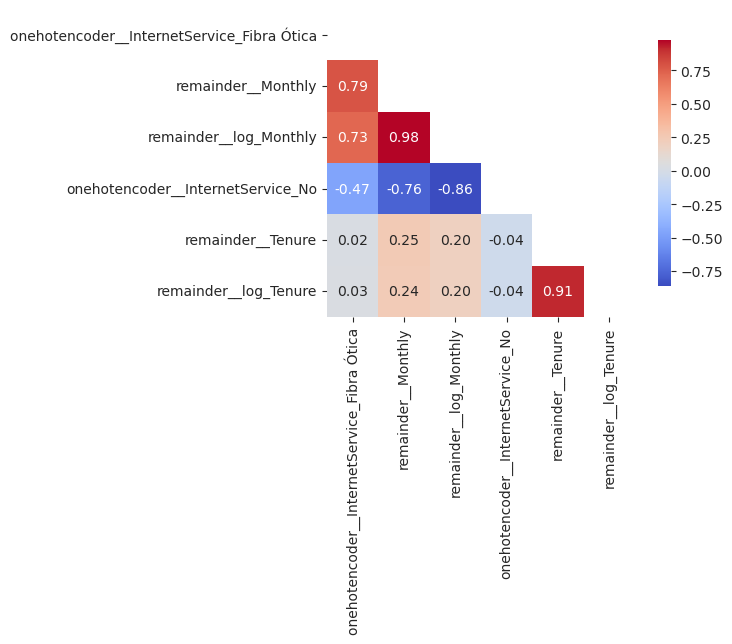

In [54]:
print(f'{high_corrs_columns}\n')
pprint(high_corrs)
plot_correlation(x, high_corrs_columns) # type: ignore

#### Considerations

1. Log-transformed values are correlated to the originals as expected, but it shall be used either one or the other in the training phase.

3. The only correlations above 0.7 found are between the existance of Internet Service and the Monthly fee. This information is important and shall be kept.
3.  `log_Monthly`'s correlation with the existance of Internet Service is even higher, which may be a redflag in the decision of using logistic regression. Experimentation shall be more prudent.

#### Feature vs Target correlations

In [55]:
features = list(x.columns) # type: ignore
y_df = pd.DataFrame(y, columns=['CHURN']) # type: ignore
full_dataset = pd.concat([x, y_df], axis=1) # type: ignore

full_dataset.corr()['CHURN']

onehotencoder__Gender_Male                               -0.009048
onehotencoder__MultipleLines_Yes                          0.036857
onehotencoder__InternetService_DSL                       -0.119156
onehotencoder__InternetService_Fibra Ótica                0.296382
onehotencoder__InternetService_No                        -0.219549
onehotencoder__OnlineSecurity_Yes                        -0.163172
onehotencoder__OnlineBackup_Yes                          -0.084381
onehotencoder__DeviceProtection_Yes                      -0.065150
onehotencoder__TechSupport_Yes                           -0.158378
onehotencoder__StreamingTV_Yes                            0.062414
onehotencoder__StreamingMovies_Yes                        0.059811
onehotencoder__Contract_Anual                            -0.173373
onehotencoder__Contract_Bianual                          -0.290965
onehotencoder__Contract_Mensal                            0.391523
onehotencoder__PaymentMethod_Bank transfer (automatic)   -0.11

##### Plotting

In [56]:
def corr_analysis(df: pd.DataFrame, features: list[str]) -> None:
    i = 0
    j = 4
    while i < len(features):
        if i < 24:
            current_features = features[i:j]
        else:
            current_features = features[i:]
        current_features.append('CHURN')
        plot_correlation(df, current_features) # type: ignore
        i = j
        j += 4

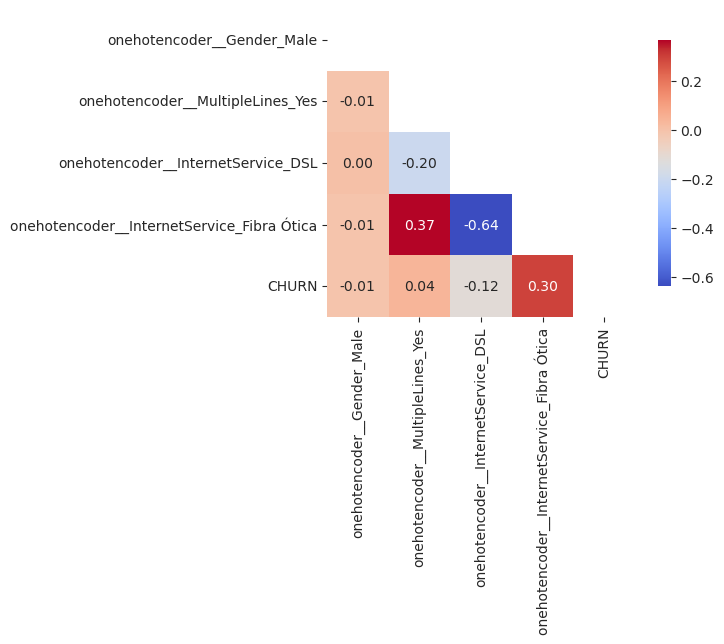

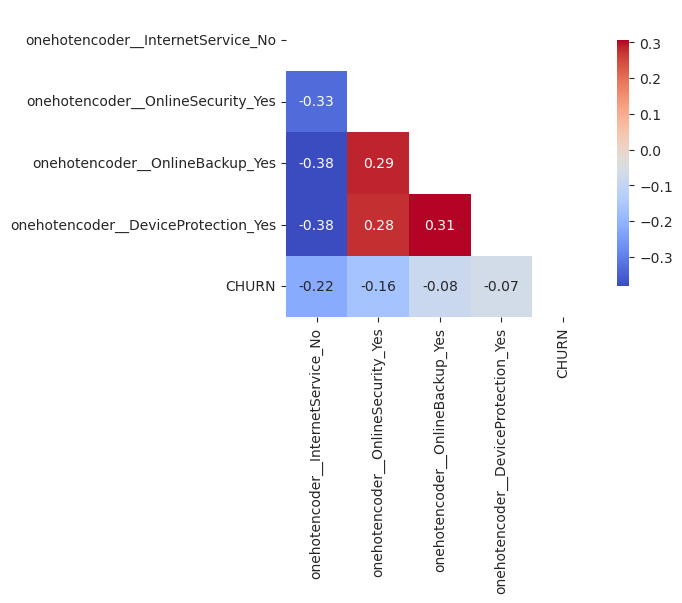

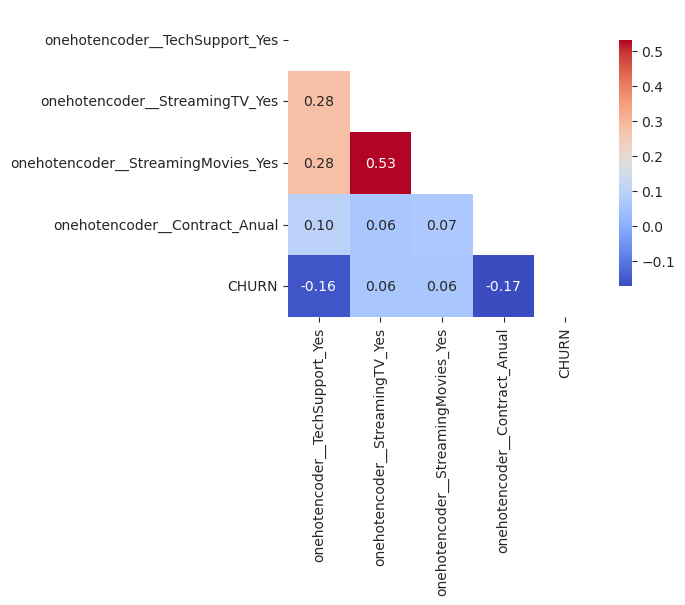

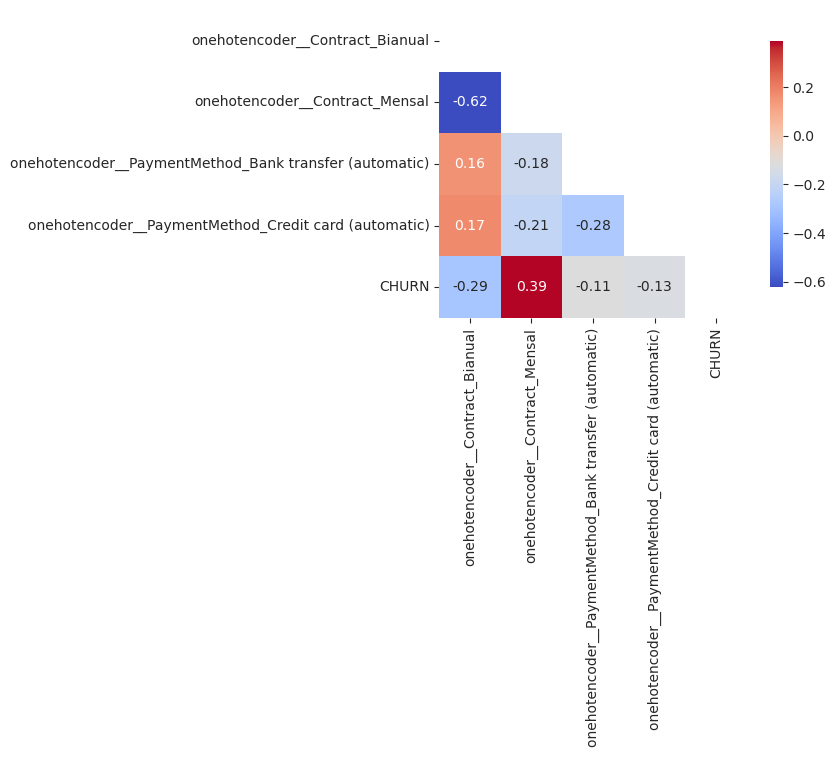

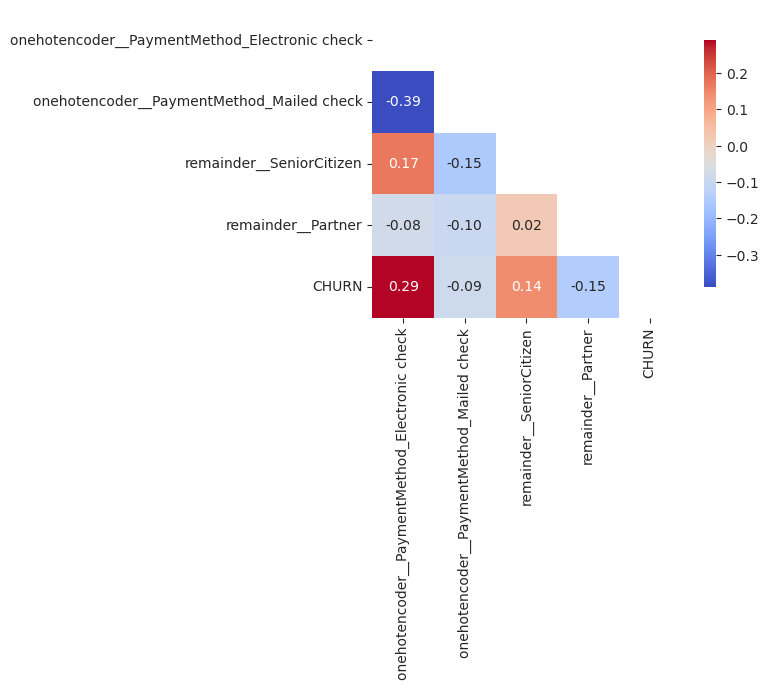

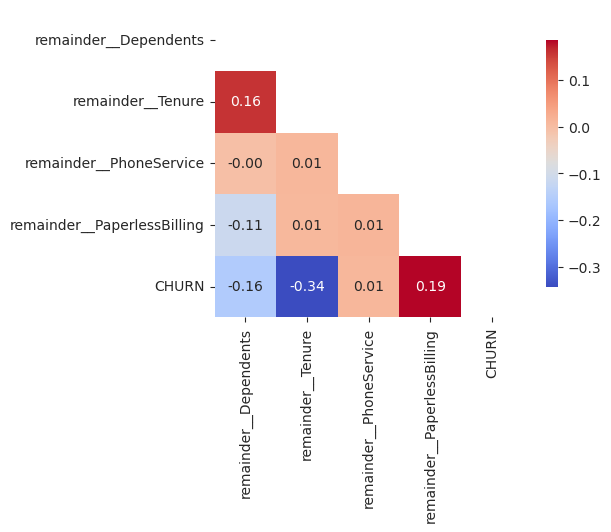

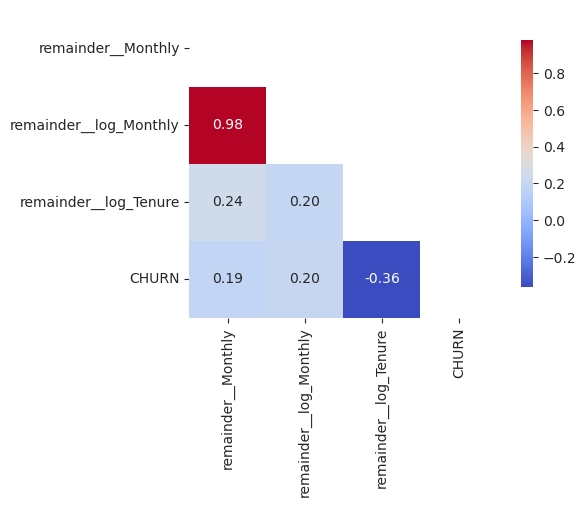

In [57]:
corr_analysis(full_dataset, features)

#### Considerations

No strong individual correlations between the churn and the other variables were found.  

To illustrate:
- The higher correlation score was 0.39 for `Contract_Mensal`

- The second higher correlation score was -0.36 for for `log_Tenure` (-0.34 for original Tenure).

Those correlation values are not explainable enough when considered isolated. The reasons for churn seem to be non-linear and/or interaction-based, which benefits from all the current defined features.

### Spliting train and test sets

The strategy decided to be adopted will be of using GridSearch Cross Validation with Stratified K-Fold, which therefore needs splitting data into train and test, but not to manually split validation sets.

#### X and Y

Visualizing to check if everything is OK.

In [58]:
print(f'=> X Variable:\n\n{x.iloc[0]}') # type: ignore

=> X Variable:

onehotencoder__Gender_Male                                0.000000
onehotencoder__MultipleLines_Yes                          0.000000
onehotencoder__InternetService_DSL                        1.000000
onehotencoder__InternetService_Fibra Ótica                0.000000
onehotencoder__InternetService_No                         0.000000
onehotencoder__OnlineSecurity_Yes                         0.000000
onehotencoder__OnlineBackup_Yes                           1.000000
onehotencoder__DeviceProtection_Yes                       0.000000
onehotencoder__TechSupport_Yes                            1.000000
onehotencoder__StreamingTV_Yes                            1.000000
onehotencoder__StreamingMovies_Yes                        0.000000
onehotencoder__Contract_Anual                             1.000000
onehotencoder__Contract_Bianual                           0.000000
onehotencoder__Contract_Mensal                            0.000000
onehotencoder__PaymentMethod_Bank transfer (au

In [59]:
print(f'=> Y Variable:\n\n{y}')

=> Y Variable:

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7262    0.0
7263    1.0
7264    0.0
7265    0.0
7266    0.0
Length: 7267, dtype: float64


All values are `float64` ranging from 0 to 1.

#### Splitting

A function shall consider either to use the original or the log-transformed continous variables.

In [60]:
def split_data(x, y, test_size=0.2, random_state=42, is_log=False):
    if is_log:
        x = x.drop(columns=['remainder__Tenure', 'remainder__Monthly'])
    else:
        x = x.drop(columns=['remainder__log_Tenure', 'remainder__log_Monthly'])
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

In [61]:
x_train, x_test, y_train, y_test = split_data(x, y, test_size=0.2, random_state=42, is_log=False)
x_train_log, x_test_log, y_train_log, y_test_log = split_data(x, y, test_size=0.2, random_state=42, is_log=True)

In [62]:
print('=> Train and Test Data:\n')

print('With Tenure and Monthly:\n')
print('Shapes: x_train, x_test, y_train, y_test')
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, '\n')
print('X Columns:\n')
print(x_train.columns, '\n')

=> Train and Test Data:

With Tenure and Monthly:

Shapes: x_train, x_test, y_train, y_test
(5813, 25) (1454, 25) (5813,) (1454,) 

X Columns:

Index(['onehotencoder__Gender_Male', 'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fibra Ótica',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Anual', 'onehotencoder__Contract_Bianual',
       'onehotencoder__Contract_Mensal',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'remainder__Part

In [63]:
print('=> Train and Test Data:\n')

print('With log_Tenure and log_Monthly:\n')
print('Shapes: x_train_log, x_test_log, y_train_log, y_test_log')
print(x_train_log.shape, x_test_log.shape, y_train_log.shape, y_test_log.shape, '\n')
print('X Columns:\n')
print(x_train_log.columns, '\n')

=> Train and Test Data:

With log_Tenure and log_Monthly:

Shapes: x_train_log, x_test_log, y_train_log, y_test_log
(5813, 25) (1454, 25) (5813,) (1454,) 

X Columns:

Index(['onehotencoder__Gender_Male', 'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fibra Ótica',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_Yes',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Anual', 'onehotencoder__Contract_Bianual',
       'onehotencoder__Contract_Mensal',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',

### Oversampling with SMOTE

SMOTE oversampling strategy will be used to balance the 'Churn' (Y) variable in the training sets

In [64]:
def oversample(x_train, y_train):
    sm = SMOTE(random_state=42)
    x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train) # type: ignore
    return x_train_sm, y_train_sm

In [65]:
x_train_sm, y_train_sm = oversample(x_train, y_train)
x_train_log_sm, y_train_log_sm = oversample(x_train_log, y_train_log)

print('Shape original x_train, y_train:', x_train_sm.shape, y_train_sm.shape)
print('Shape x_train_log, y_train_log:', x_train_log_sm.shape, y_train_log_sm.shape)

Shape original x_train, y_train: (8534, 25) (8534,)
Shape x_train_log, y_train_log: (8534, 25) (8534,)


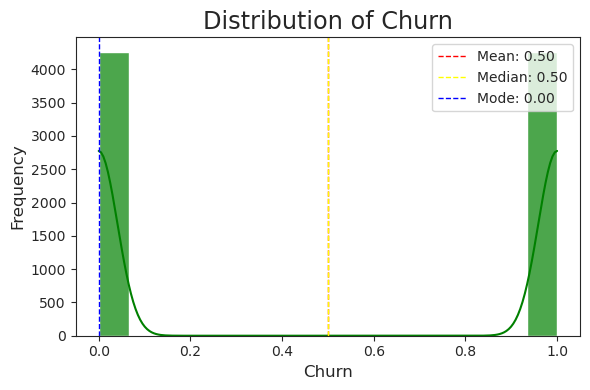

In [66]:
plot_feature(pd.DataFrame(y_train_sm, columns=['Churn']), 'Churn')

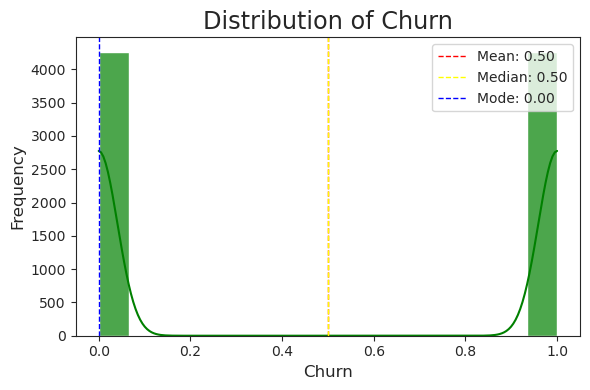

In [67]:
plot_feature(pd.DataFrame(y_train_log_sm, columns=['Churn']), 'Churn')

## Cross Validating Models

This section aims at cross validating 3 models:  
- Logistic regression
- Decision tree classifier
- Random forest classifier

The 2 best will be chosen.

### Setup

#### Instantiate models and cross validator

<small>Hyperparameters were previously tested through GridSearchCV to arrive at the best ones for this case.  
Code was omitted to improve performance and readability.</small>

In [68]:
def instantiate_models() -> tuple[DummyClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]:
    dummy_model = DummyClassifier(strategy='most_frequent')
    log_clf = LogisticRegression(C=0.01,
                                penalty='l2',          # L2 regularization
                                solver='liblinear',    # Use liblinear solver
                                max_iter=1000,         # Increase max iterations
                                random_state=42)
    dt_clf = DecisionTreeClassifier(
        max_depth=7,               # Limit tree depth
        min_samples_split=10,      # Require more samples to split
        min_samples_leaf=5,        # Minimum samples in each leaf
        max_leaf_nodes=30,         # Limit total leaves
        random_state=42
    )
    rf_clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=6,                  # Limit tree depth
        min_samples_leaf=5,           # Prevent small terminal nodes
        max_features='sqrt',          # Use fewer features per split
        class_weight='balanced',      # Handle imbalance if applicable
        random_state=42
    )

    return dummy_model, log_clf, dt_clf, rf_clf

In [69]:
dummy_model, log_clf, dt_clf, rf_clf = instantiate_models()
cv_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### Setup scorers

In [70]:
classification_scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': 'roc_auc'
}

#### Dummy model for benchmark

##### Cross Validate

In [71]:
cv_results_dummy = cross_validate(
    dummy_model,
    pd.DataFrame(x_train_sm),
    y_train_sm,
    cv=5,
    scoring=classification_scorers,
    return_train_score=True
)

##### Validation function

Function to compare the results of models with the results of Dummy Classifier.

In [72]:
def validate_with_dummy(dummy_results: Dict[str, np.ndarray], model_results: Dict[str, np.ndarray]) -> pd.DataFrame:
    # Extract only the test scores
    dummy_scores = {k.replace("test_", ""): v.mean() for k, v in dummy_results.items() if k.startswith("test_")}
    model_scores = {k.replace("test_", ""): v.mean() for k, v in model_results.items() if k.startswith("test_")}

    comparison_df = pd.DataFrame({
        'Dummy': {metric: scores for metric, scores in dummy_scores.items()},
        'Model': {metric: scores for metric, scores in model_scores.items()},
    })

    comparison_df['Difference'] = comparison_df['Model'] - comparison_df['Dummy']
    comparison_df = comparison_df.round(4)

    return comparison_df
    

##### Comparing function

In [73]:
def compare_models(models_names: List[str], models_results: List[Dict[str, np.ndarray]]) -> tuple[pd.DataFrame, pd.DataFrame]:
    results_df = pd.DataFrame()
    ranking_df = pd.DataFrame()

    for model_name, model_results in zip(models_names, models_results):
        model_scores = {k.replace("test_", ""): v.mean() for k, v in model_results.items() if k.startswith("test_")}
        results_df[model_name] = model_scores
    means = results_df.describe().iloc[1]
    results_df.loc['average_score'] = means

    top_models = results_df.apply(lambda row: row.nlargest(len(models_names)).index.tolist(), axis=1)
    for i in range(len(models_names)):
        ranking_df[f'Rank {i+1}'] = top_models.apply(lambda x: x[i])
    
    return (results_df, ranking_df)

#### Functions to print results

In [74]:
def print_results(results: Dict[str, np.ndarray]) -> None:
    print('=> Results:\n')
    pprint(results)
    print('-' * 30, '\n', '=> Averages:')
    results_df = pd.DataFrame(results)
    print(results_df.mean())

def dummy_comparison(results: Dict[str, np.ndarray]) -> None:
    print('=> Comparison with Dummy Model:\n')
    pprint(validate_with_dummy(cv_results_dummy, results))

### Experimentation

#### Logistic Regression Model

##### Cross Validate

In [75]:
log_results = cross_validate(
    log_clf, 
    pd.DataFrame(x_train_log_sm), 
    y_train_log_sm, 
    scoring=classification_scorers,
    cv=cv_skfold,
    return_train_score=True
)

##### Results

In [76]:
print_results(log_results)

=> Results:

{'fit_time': array([0.01977539, 0.01478958, 0.01451898, 0.0138011 , 0.0169661 ]),
 'score_time': array([0.01627803, 0.01512718, 0.01232815, 0.01270247, 0.01223135]),
 'test_accuracy': array([0.77973052, 0.75336848, 0.78500293, 0.77562976, 0.75791325]),
 'test_f1': array([0.78733032, 0.75873926, 0.79135873, 0.786867  , 0.76467236]),
 'test_precision': array([0.76065574, 0.74215247, 0.76906077, 0.74973489, 0.74390244]),
 'test_recall': array([0.81594373, 0.77608441, 0.81498829, 0.82786885, 0.7866354 ]),
 'test_roc_auc': array([0.84942317, 0.8347189 , 0.85775922, 0.84884661, 0.83166027]),
 'train_accuracy': array([0.77017724, 0.77457155, 0.76739417, 0.76929837, 0.77357938]),
 'train_f1': array([0.77760454, 0.78259641, 0.77526182, 0.77650064, 0.78033532]),
 'train_precision': array([0.75336446, 0.75579809, 0.74979469, 0.75288938, 0.75772627]),
 'train_recall': array([0.80345636, 0.81136497, 0.80251978, 0.80164079, 0.80433509]),
 'train_roc_auc': array([0.84475577, 0.84829856, 

In [77]:
dummy_comparison(log_results)

=> Comparison with Dummy Model:

            Dummy   Model  Difference
accuracy   0.4998  0.7703      0.2706
precision  0.1999  0.7531      0.5532
recall     0.4000  0.8043      0.4043
f1         0.2666  0.7778      0.5112
roc_auc    0.5000  0.8445      0.3445


#### Decision Tree Classifier

##### Cross Validate

In [78]:
dt_results = cross_validate(
    dt_clf, 
    pd.DataFrame(x_train_sm), 
    y_train_sm, 
    scoring=classification_scorers,
    cv=cv_skfold,
    return_train_score=True
)

##### Results

In [79]:
print_results(dt_results)

=> Results:

{'fit_time': array([0.02594161, 0.02040553, 0.01931477, 0.01889563, 0.01974463]),
 'score_time': array([0.02138305, 0.01285362, 0.01346254, 0.01293421, 0.01347852]),
 'test_accuracy': array([0.7943761 , 0.74926772, 0.80550674, 0.79320445, 0.76846424]),
 'test_f1': array([0.79931389, 0.74674556, 0.81093394, 0.79954571, 0.77415666]),
 'test_precision': array([0.78013393, 0.75388292, 0.78935698, 0.77618523, 0.75558036]),
 'test_recall': array([0.81946073, 0.73974209, 0.83372365, 0.82435597, 0.7936694 ]),
 'test_roc_auc': array([0.84911773, 0.83097334, 0.86702395, 0.84570437, 0.82530246]),
 'train_accuracy': array([0.79903325, 0.79537132, 0.79273473, 0.80079098, 0.79950205]),
 'train_f1': array([0.80566572, 0.79428656, 0.79631496, 0.80687305, 0.80622788]),
 'train_precision': array([0.78003291, 0.79863784, 0.78268251, 0.78286029, 0.78006026]),
 'train_recall': array([0.83304042, 0.78998243, 0.81043071, 0.83240551, 0.83421207]),
 'train_roc_auc': array([0.85616627, 0.8623063 , 

In [80]:
dummy_comparison(dt_results)

=> Comparison with Dummy Model:

            Dummy   Model  Difference
accuracy   0.4998  0.7822      0.2824
precision  0.1999  0.7710      0.5711
recall     0.4000  0.8022      0.4022
f1         0.2666  0.7861      0.5196
roc_auc    0.5000  0.8436      0.3436


#### Random Forest Classifier

##### Cross Validate

In [81]:
rf_results = cross_validate(
    rf_clf, 
    pd.DataFrame(x_train_sm), 
    y_train_sm, 
    scoring=classification_scorers,
    cv=cv_skfold,
    return_train_score=True
)

##### Results

In [82]:
print_results(rf_results)

=> Results:

{'fit_time': array([   0.40098143,    0.39361501,    0.39397597, -269.23795891,
          0.38889265]),
 'score_time': array([0.04003167, 0.03857708, 0.03851771, 0.03854251, 0.03955746]),
 'test_accuracy': array([0.79379028, 0.77738723, 0.81546573, 0.78617458, 0.7866354 ]),
 'test_f1': array([0.80357143, 0.78794643, 0.82548476, 0.79956068, 0.79619261]),
 'test_precision': array([0.76677316, 0.75186368, 0.78338591, 0.75284385, 0.76205788]),
 'test_recall': array([0.84407972, 0.82766706, 0.87236534, 0.85245902, 0.83352872]),
 'test_roc_auc': array([0.87432632, 0.86481656, 0.88725287, 0.87220885, 0.85595629]),
 'train_accuracy': array([0.80210927, 0.80752893, 0.80284166, 0.80342757, 0.80785003]),
 'train_f1': array([0.81186464, 0.81719533, 0.81300361, 0.81329994, 0.81893458]),
 'train_precision': array([0.77382533, 0.7782194 , 0.77305152, 0.77430464, 0.77426931]),
 'train_recall': array([0.85383714, 0.8602812 , 0.85731028, 0.85643129, 0.86906854]),
 'train_roc_auc': array([0.

In [83]:
dummy_comparison(rf_results)

=> Comparison with Dummy Model:

            Dummy   Model  Difference
accuracy   0.4998  0.7919      0.2921
precision  0.1999  0.7634      0.5635
recall     0.4000  0.8460      0.4460
f1         0.2666  0.8026      0.5360
roc_auc    0.5000  0.8709      0.3709


#### Final Comparison

In [84]:
models_names = ['Dummy', 'Logistic Regression', 'Decision Tree', 'Random Forest']
models_results = [cv_results_dummy, log_results, dt_results, rf_results]
results, ranking = compare_models(models_names, models_results)

In [85]:
results.head(6)

,Dummy,Logistic Regression,Decision Tree,Random Forest
accuracy,0.499766,0.770329,0.782164,0.791891
precision,0.199883,0.753101,0.771028,0.763385
recall,0.400000,0.804304,0.802190,0.846020
f1,0.266562,0.777794,0.786139,0.802551
roc_auc,0.500000,0.844482,0.843624,0.870912
average_score,0.373242,0.790002,0.797029,0.814952


In [86]:
ranking.head(6)

,Rank 1,Rank 2,Rank 3,Rank 4
accuracy,Random Forest,Decision Tree,Logistic Regression,Dummy
precision,Decision Tree,Random Forest,Logistic Regression,Dummy
recall,Random Forest,Logistic Regression,Decision Tree,Dummy
f1,Random Forest,Decision Tree,Logistic Regression,Dummy
roc_auc,Random Forest,Logistic Regression,Decision Tree,Dummy
average_score,Random Forest,Decision Tree,Logistic Regression,Dummy


### Considerations

No model overfits and all of them generalize well for unseen data, with metrics being similar both in train and test predictions.   
The scores for the 3 models are similar and very close to each other, which makes difficult to pick. Some key insights could be drawn through this experimentation:  


1. `Random Forest` classifier outperforms other models in all metrics, including `recall`, which is the most important metric for our use case.

2. The 2nd in the rank of recall is Logistic Regression, but it outperforms `Decision tree` in only 0.0021.  
It also outperforms in the Area Under de Curve (AUC), but then again, the difference is 0.0008.

3. `Logistic Regression` has the best generalization when comparing train vs test results. 

## Experimenting Models

### Fitting

Fitting models to training data.

In [87]:
rf_clf.fit(pd.DataFrame(x_train_sm), y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=5,
                       random_state=42)

In [88]:
dt_clf.fit(pd.DataFrame(x_train_sm), y_train_sm)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [89]:
log_clf.fit(pd.DataFrame(x_train_log_sm), y_train_log_sm)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [90]:
models = {
    'random_forest': rf_clf,
    'decision_tree': dt_clf,
    'logistic_regression': log_clf
}

### Predicting

Predicting values and probabilities for Y.

In [91]:
predictions = {
    'random_forest': {
        'classification': models['random_forest'].predict(pd.DataFrame(x_test)),
        'probability': models['random_forest'].predict_proba(pd.DataFrame(x_test))
    },
    'decision_tree': {
        'classification': models['decision_tree'].predict(pd.DataFrame(x_test)),
        'probability': models['decision_tree'].predict_proba(pd.DataFrame(x_test))
    },
    'logistic_regression': {
        'classification': models['logistic_regression'].predict(pd.DataFrame(x_test_log)),
        'probability': models['logistic_regression'].predict_proba(pd.DataFrame(x_test_log))
    }
}

### Confusion Matrix

Validating model performances in the real use case.

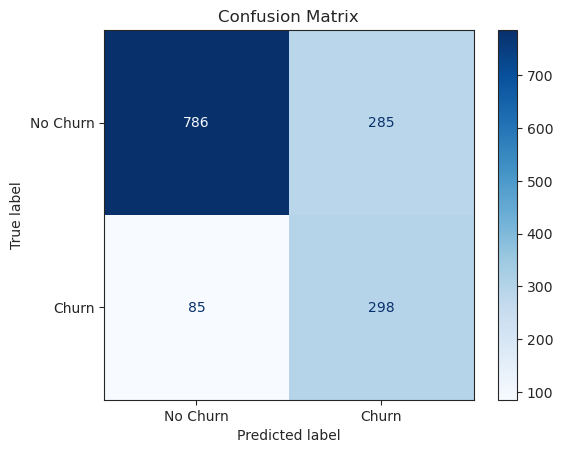

              precision    recall  f1-score   support

    No Churn       0.90      0.73      0.81      1071
       Churn       0.51      0.78      0.62       383

    accuracy                           0.75      1454
   macro avg       0.71      0.76      0.71      1454
weighted avg       0.80      0.75      0.76      1454



In [92]:
plot_confusion_matrix(y_test, predictions['random_forest']['classification'], labels=['No Churn', 'Churn'])

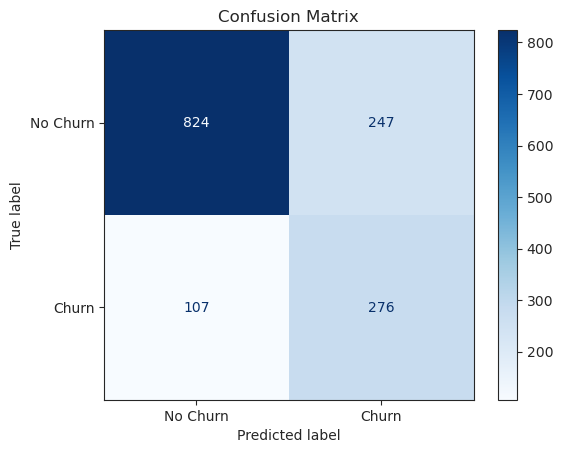

              precision    recall  f1-score   support

    No Churn       0.89      0.77      0.82      1071
       Churn       0.53      0.72      0.61       383

    accuracy                           0.76      1454
   macro avg       0.71      0.75      0.72      1454
weighted avg       0.79      0.76      0.77      1454



In [93]:
plot_confusion_matrix(y_test, predictions['decision_tree']['classification'], labels=['No Churn', 'Churn'])

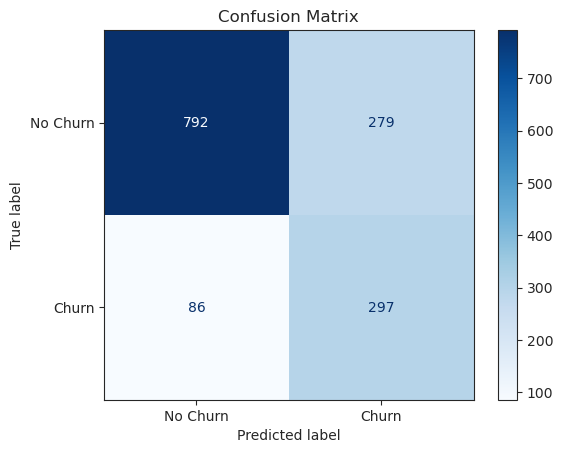

              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1071
       Churn       0.52      0.78      0.62       383

    accuracy                           0.75      1454
   macro avg       0.71      0.76      0.72      1454
weighted avg       0.80      0.75      0.76      1454



In [94]:
plot_confusion_matrix(y_test, predictions['logistic_regression']['classification'], labels=['No Churn', 'Churn'])

#### Considerations

Confusion matrices show that, even though models do not perform so fine in terms of precision to predict `churn`, they all do quite well in terms of recall.   
`Recall` is the metric we are mostly interested in, considering that the cost of failing to predict a churn is higher than the cost of falsely predicting one.  

Further analysis will be made focusing on feature relevance in seek to improve `Recall` in all the models.

### Feature Importances

Analyzing feature importances to gather further insights and check if some features can be dropped.

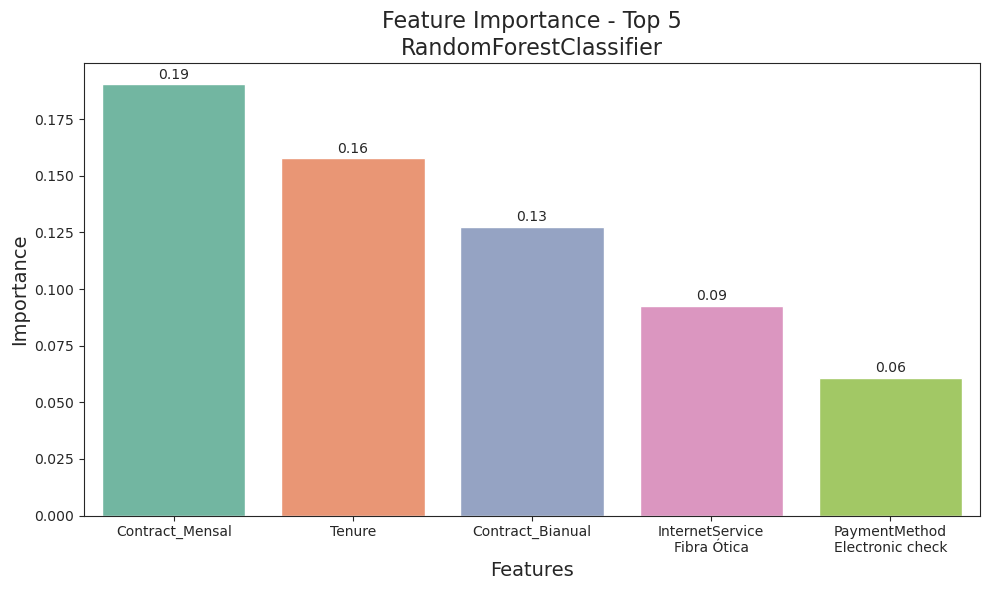

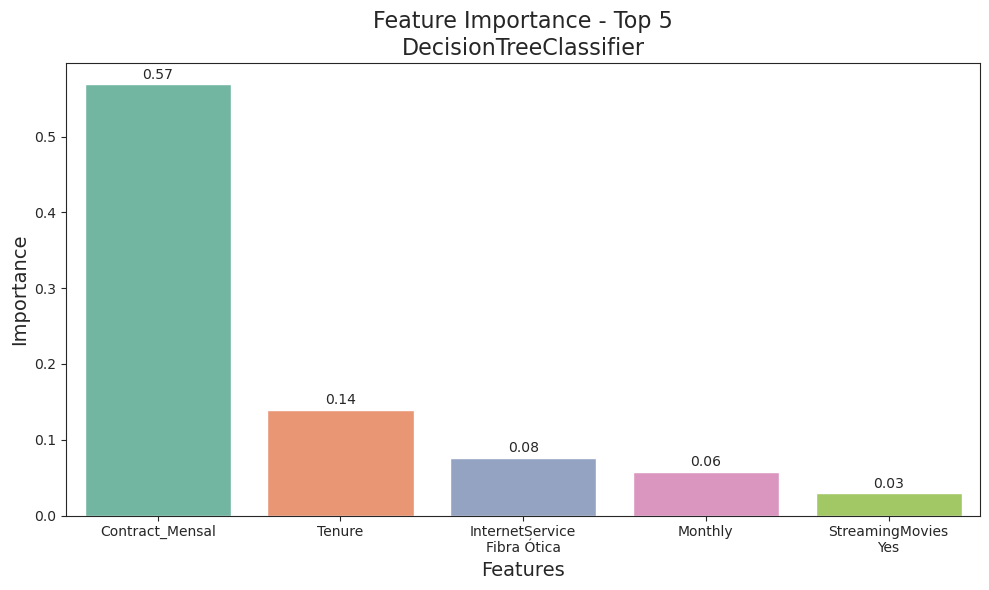

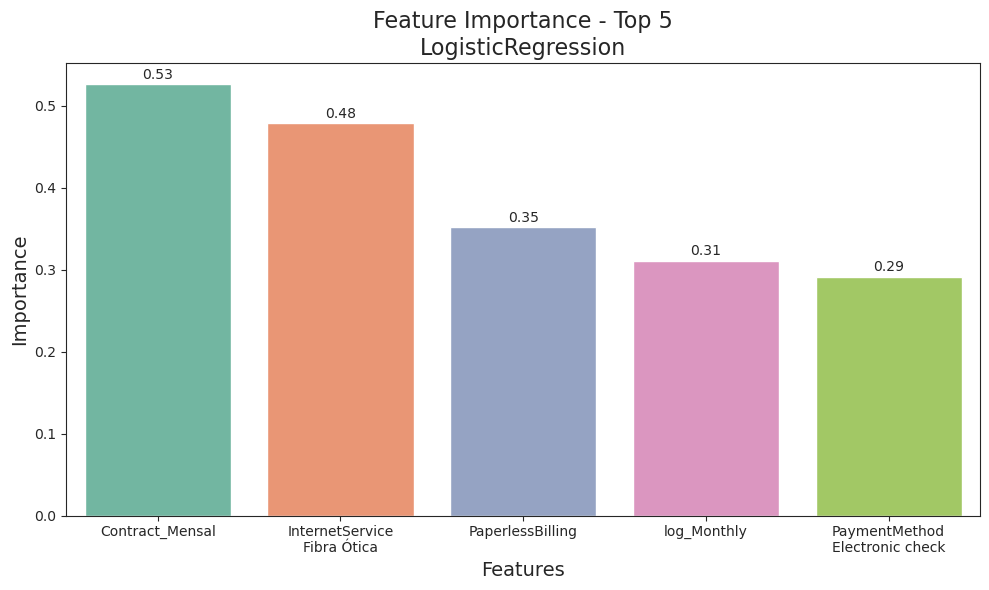

In [95]:
feature_importances = {
    'random_forest': get_feature_importances(models['random_forest'], pd.DataFrame(x_train)),
    'decision_tree': get_feature_importances(models['decision_tree'], pd.DataFrame(x_train)),
    'logistic_regression': get_feature_importances(models['logistic_regression'], pd.DataFrame(x_train_log))
}

#### Summary

The features in this summary are ordered by average importance considering the 3 models, from most to least important feature.

In [96]:
feature_importances_summary = get_feature_importances_summary(feature_importances).reset_index(drop=True)
feature_importances_summary

,Feature,random_forest,decision_tree,logistic_regression,average
0,log_Tenure,NaN,NaN,-0.645615,-0.645615
1,Contract_Mensal,0.190340,0.568715,0.525998,0.428351
2,log_Monthly,NaN,NaN,0.311045,0.311045
3,InternetService_Fibra Ótica,0.092540,0.076387,0.478393,0.215773
4,Tenure,0.157749,0.139699,NaN,0.148724
5,PaperlessBilling,0.040438,0.016376,0.351538,0.136117
6,InternetService_No,0.042766,0.020883,-0.467610,-0.134654
7,PaymentMethod_Electronic check,0.060761,0.021755,0.290901,0.124472
8,StreamingMovies_Yes,0.012982,0.029100,0.290678,0.110920
9,Contract_Bianual,0.127303,0.021607,-0.477295,-0.109462


#### Best Features

Best features across all models from feature importances.

In [97]:
def check_best_features(feature_importances_df, models=['random_forest', 'decision_tree', 'logistic_regression'], top_n=5) -> list[str]:
    best = set()
    for model in models:
        best.update(feature_importances_df.sort_values(by=model, ascending=False)['Feature'].head(top_n).tolist())

    return list(best)

best_features_feature_importances = check_best_features(feature_importances_summary)
print(best_features_feature_importances)

['PaperlessBilling', 'InternetService_Fibra Ótica', 'Contract_Bianual', 'StreamingMovies_Yes', 'Contract_Mensal', 'log_Monthly', 'Tenure', 'Monthly', 'PaymentMethod_Electronic check']


### Permutation Importances

Permutation importances can provide deeper insights on feature importances.

In [98]:
feature_permutation_importances = {
    'random_forest': get_feature_permutation_importances(models['random_forest'], x_train, y_train),
    'decision_tree': get_feature_permutation_importances(models['decision_tree'], x_train, y_train),
    'logistic_regression': get_feature_permutation_importances(models['logistic_regression'], x_train_log, y_train_log)
}

print('=> feature_permutation_importances structure:\n')
print(f'type = {type(feature_permutation_importances)}')
for key, value in feature_permutation_importances.items():
    print(f'\t{key}: {value.keys()}')

=> feature_permutation_importances structure:

type = <class 'dict'>
	random_forest: dict_keys(['roc_auc', 'precision', 'recall', 'f1', 'accuracy', 'summary'])
	decision_tree: dict_keys(['roc_auc', 'precision', 'recall', 'f1', 'accuracy', 'summary'])
	logistic_regression: dict_keys(['roc_auc', 'precision', 'recall', 'f1', 'accuracy', 'summary'])


#### Recall - Top 5

We will focus on recall, which is the most important metric for our case.

In [99]:
feature_permutation_importances['random_forest']['recall'].head()

,Feature,Mean Importance,Std Dev
13,Contract_Mensal,0.260802,0.010267
21,Tenure,0.095343,0.007022
12,Contract_Bianual,0.085446,0.005810
3,InternetService_Fibra Ótica,0.021345,0.003816
11,Contract_Anual,0.012549,0.003132


In [100]:
feature_permutation_importances['decision_tree']['recall'].head()

,Feature,Mean Importance,Std Dev
13,Contract_Mensal,0.300453,0.009226
3,InternetService_Fibra Ótica,0.275226,0.010844
21,Tenure,0.252587,0.008249
24,Monthly,0.099612,0.003566
16,PaymentMethod_Electronic check,0.032536,0.002489


In [101]:
feature_permutation_importances['logistic_regression']['recall'].head()

,Feature,Mean Importance,Std Dev
24,log_Tenure,0.159379,0.009185
13,Contract_Mensal,0.045796,0.002616
12,Contract_Bianual,0.030207,0.002879
3,InternetService_Fibra Ótica,0.026908,0.004603
4,InternetService_No,0.017594,0.002329


#### Summary

The features in this summary are ordered by average `recall` importance considering the 3 models, from most to least important feature.

In [102]:
feature_permutation_importances_summary = get_permutation_importances_summary(feature_permutation_importances)
feature_permutation_importances_summary

,Feature,random_forest,decision_tree,logistic_regression,average
2,Contract_Mensal,2.608021e-01,0.300453,0.045796,0.202350
24,Tenure,9.534282e-02,0.252587,NaN,0.173965
26,log_Tenure,NaN,NaN,0.159379,0.159379
7,InternetService_Fibra Ótica,2.134541e-02,0.275226,0.026908,0.107827
9,Monthly,9.508409e-03,0.099612,NaN,0.054560
1,Contract_Bianual,8.544631e-02,0.003364,0.030207,0.039672
17,PaymentMethod_Electronic check,7.115136e-03,0.032536,0.009314,0.016322
25,log_Monthly,NaN,NaN,0.013389,0.013389
8,InternetService_No,7.632600e-03,0.002911,0.017594,0.009379
21,StreamingMovies_Yes,3.234153e-04,0.017723,0.004269,0.007439


#### Best Features

Best features across all models from feature permutation importances.

In [103]:
best_features_permutation_importances = check_best_features(feature_permutation_importances_summary)
print(best_features_permutation_importances)

['InternetService_Fibra Ótica', 'Contract_Bianual', 'InternetService_No', 'Contract_Mensal', 'log_Tenure', 'Contract_Anual', 'Tenure', 'Monthly', 'PaymentMethod_Electronic check']


### Best of the best features

Best ranked features from both feature importances and permutation importances evaluations.

In [104]:
print(set(best_features_feature_importances).intersection(best_features_permutation_importances))

{'InternetService_Fibra Ótica', 'Contract_Bianual', 'Contract_Mensal', 'Tenure', 'Monthly', 'PaymentMethod_Electronic check'}


The best evaluated features across all models and across a battery of evaluations from feature_importances_ (on Tree Models), coefficients (on Logistic Regression), and Feature Permutation Importances are:
- Monthly

- InternetService_Fibra Ótica
- Tenure
- PaymentMethod_Electronic check
- Contract_Bianual
- Contract_Mensal

The nature of those features shows that the main problem in churn is probably related to one, much or all of the following:
- Pricing policies

- Quality of internet service
- Problems of UI/UX in electronic receipt
- Contractual problems such as:
    - High fines

    - Bureaucracy

## Refining Models

Dropping unuseful and unimportant data is a good way to avoid low performance in Big Data. This section aims at cleansing the models to its best versions, whilst keeping metrics as close as possible to the previous analysis.

### Candidates to dropping

It is time to check the worst performing features and consider dropping them.  
This section generates statistics of the worst features to cross evaluate and drop.

In [105]:
candidates_to_drop = FeatureDropCandidates()

=> Initialized FeatureDropCandidates object.
=> candidates_to_drop structure:

type = <class 'dict'>
	random_forest: set()
	decision_tree: set()
	logistic_regression: set()
	all: set()


#### From Feature Importances

Analyzing candidates to drop from feature importances metrics.

In [106]:
def get_candidates_to_drop_from_feature_importances(thresholds: dict[str, float]):
    candidates_to_drop.get_from_importances(model='random_forest',
                                                    feature_importances=feature_importances,
                                                    threshold=thresholds['random_forest'])
    candidates_to_drop.get_from_importances(model='decision_tree',
                                                    feature_importances=feature_importances,
                                                    threshold=thresholds['decision_tree'])
    candidates_to_drop.get_from_importances(model='logistic_regression',
                                                    feature_importances=feature_importances,
                                                    threshold=thresholds['logistic_regression'])

In [107]:
# Features with values below those thresholds will be added to candidates to drop from feature importances
get_candidates_to_drop_from_feature_importances(thresholds={
    'random_forest': 0.005,
    'decision_tree': 0.005,
    'logistic_regression': 0.03
})
candidates_to_drop_from_feature_importances = candidates_to_drop.get_candidates()
candidates_to_drop_from_feature_importances_df = candidates_to_drop.generalize().sort_values('random_forest', ascending=False).set_index('Feature')
candidates_to_drop.reset()

=> Reinitialized FeatureDropCandidates object.
=> candidates_to_drop structure:

type = <class 'dict'>
	random_forest: set()
	decision_tree: set()
	logistic_regression: set()
	all: set()


##### Feature Importances - Worst Features

In [108]:
# Candidates to drop == 'Yes' for all models
list(candidates_to_drop_from_feature_importances_df[candidates_to_drop_from_feature_importances_df['best_candidates'] == 'Yes']['best_candidates'].index)

[]

#### From Feature Permutation Importances

Analyzing candidates to drop from feature permutation importances metrics.

In [109]:
def organize_df(df):
    return df.sort_values('recall', ascending=False).set_index('Feature')

# Features with values below those thresholds will be added to candidates to drop from permutation importances
thresholds = {
    'roc_auc':   0.001,
    'precision': 0.001,
    'recall':    0.002,
    'f1':        0.001,
    'accuracy':  0.001
}

candidates_from_permutation_per_model = {
    'random_forest': organize_df(candidates_to_drop.get_from_permutation(feature_permutation_importances, 'random_forest', thresholds=thresholds)),
    'decision_tree': organize_df(candidates_to_drop.get_from_permutation(feature_permutation_importances, 'decision_tree', thresholds=thresholds)),
    'logistic_regression': organize_df(candidates_to_drop.get_from_permutation(feature_permutation_importances, 'logistic_regression', thresholds=thresholds))
}

In [110]:
candidates_to_drop_from_permutation_importances = candidates_to_drop.get_candidates()
candidates_to_drop_from_permutation_importances_df = candidates_to_drop.generalize().sort_values('best_candidates', ascending=False).set_index('Feature')

##### Permutation Importances - Worst Features

In [111]:
# Candidates to drop == 'Yes' for all models
list(candidates_to_drop_from_permutation_importances_df[candidates_to_drop_from_permutation_importances_df['best_candidates'] == 'Yes']['best_candidates'].index)

['PaymentMethod_Bank transfer (automatic)']

### Cross Evaluation

Evaluating candidates to drop from both feature importances and permutation importances.

In [112]:
# Reinserting candidates from feature importances
get_candidates_to_drop_from_feature_importances(thresholds={
    'random_forest': 0.005,
    'decision_tree': 0.005,
    'logistic_regression': 0.03
})

candidates_to_drop_global = candidates_to_drop.get_candidates()
candidates_to_drop_global_df = candidates_to_drop.generalize().sort_values('Feature', ascending=False).set_index('Feature')


In [113]:
candidates_to_drop_global_df

,random_forest,decision_tree,logistic_regression,best_candidates
Feature,,,,
TechSupport_Yes,No,Yes,No,No
StreamingTV_Yes,No,Yes,No,No
SeniorCitizen,No,Yes,No,No
PhoneService,Yes,No,No,No
PaymentMethod_Mailed check,Yes,Yes,No,No
PaymentMethod_Credit card (automatic),Yes,Yes,No,No
PaymentMethod_Bank transfer (automatic),Yes,Yes,Yes,Yes
Partner,No,Yes,Yes,No
MultipleLines_Yes,No,Yes,No,No


#### Candidates' Feature Importances

In [114]:
feature_importances_summary[feature_importances_summary['Feature'].isin(candidates_to_drop_global_df.index)].sort_values('Feature', ascending=False).set_index('Feature')

,random_forest,decision_tree,logistic_regression,average
Feature,,,,
TechSupport_Yes,0.034343,0.004077,-0.308682,-0.090087
StreamingTV_Yes,0.008752,0.000000,0.229650,0.079468
SeniorCitizen,0.007329,0.004210,0.179345,0.063628
PhoneService,0.003533,0.016350,-0.234031,-0.071383
PaymentMethod_Mailed check,0.002519,0.000000,-0.100229,-0.032570
PaymentMethod_Credit card (automatic),0.003298,0.000000,-0.159302,-0.052001
PaymentMethod_Bank transfer (automatic),0.003025,0.000000,-0.063973,-0.020316
Partner,0.016172,0.000000,-0.065603,-0.016477
MultipleLines_Yes,0.006024,0.000000,0.226415,0.077480


#### Candidates' Permutation Importances

In [115]:
feature_permutation_importances_summary[feature_permutation_importances_summary['Feature'].isin(candidates_to_drop_global_df.index)].sort_values('Feature', ascending=False).set_index('Feature')

,random_forest,decision_tree,logistic_regression,average
Feature,,,,
TechSupport_Yes,4.463131e-03,0.000000,0.014424,0.006296
StreamingTV_Yes,-1.164295e-03,0.000000,0.005886,0.001574
SeniorCitizen,-1.487710e-03,0.000000,0.005110,0.001207
PhoneService,1.552393e-03,0.012613,0.001035,0.005067
PaymentMethod_Mailed check,7.115136e-04,0.000000,-0.001164,-0.000151
PaymentMethod_Credit card (automatic),1.110223e-17,0.000000,0.004787,0.001596
PaymentMethod_Bank transfer (automatic),2.587322e-04,0.000000,-0.000647,-0.000129
Partner,4.721863e-03,0.000000,0.001488,0.002070
MultipleLines_Yes,3.234153e-04,0.000000,0.002846,0.001056


#### Analyzing Models

This section analyzes bad features model-wise.

In [116]:
def get_metrics_per_model(model, candidates_only=False):
    if candidates_only:
        candidates = list(candidates_to_drop_global[model])
        df = feature_importances_summary[feature_importances_summary['Feature'].isin(candidates)][['Feature', model]].sort_values('Feature', ascending=False)
    else:
        df = feature_importances_summary[['Feature', model]].sort_values('Feature', ascending=False)
    df = df.merge(feature_permutation_importances[model]['recall'], how='inner', on='Feature')
    df.rename(columns={
        model: 'importance/coef',
        'Mean Importance': 'perm_mean_importance_recall',
        'Std Dev': 'perm_std_dev_recall'
    }, inplace=True)
    df.sort_values('importance/coef', key=abs, ascending=False, inplace=True)
    df.set_index('Feature', inplace=True)

    return df

##### Random Forest

In [117]:
get_metrics_per_model('random_forest')

,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
Contract_Mensal,0.190340,2.608021e-01,0.010267
Tenure,0.157749,9.534282e-02,0.007022
Contract_Bianual,0.127303,8.544631e-02,0.005810
InternetService_Fibra Ótica,0.092540,2.134541e-02,0.003816
PaymentMethod_Electronic check,0.060761,7.115136e-03,0.001875
Monthly,0.053952,9.508409e-03,0.003579
InternetService_No,0.042766,7.632600e-03,0.003445
Contract_Anual,0.041935,1.254851e-02,0.003132
PaperlessBilling,0.040438,-2.781371e-03,0.003436


In [118]:
get_metrics_per_model('random_forest', candidates_only=True)

,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
DeviceProtection_Yes,0.005073,2.220446e-17,0.001157
Gender_Male,0.004723,9.702458e-04,0.001269
PhoneService,0.003533,1.552393e-03,0.000877
PaymentMethod_Credit card (automatic),0.003298,1.110223e-17,0.001043
PaymentMethod_Bank transfer (automatic),0.003025,2.587322e-04,0.000593
PaymentMethod_Mailed check,0.002519,7.115136e-04,0.000889


##### Considerations

All features perform badly both in overall importance and in recall metric permutation importance metrics.   
Other features also perform badly, like `DeviceProtection_Yes`, but a more conservative approach has been chosen for this project.

##### Decision Tree

In [119]:
get_metrics_per_model('decision_tree')


,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
Contract_Mensal,0.568715,0.300453,0.009226
Tenure,0.139699,0.252587,0.008249
InternetService_Fibra Ótica,0.076387,0.275226,0.010844
Monthly,0.057587,0.099612,0.003566
StreamingMovies_Yes,0.029100,0.017723,0.002654
PaymentMethod_Electronic check,0.021755,0.032536,0.002489
Contract_Bianual,0.021607,0.003364,0.002417
InternetService_No,0.020883,0.002911,0.003627
PaperlessBilling,0.016376,0.009573,0.001825


In [120]:
get_metrics_per_model('decision_tree', candidates_only=True)

,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
Gender_Male,0.004839,0.0,0.0
SeniorCitizen,0.004210,0.0,0.0
TechSupport_Yes,0.004077,0.0,0.0
StreamingTV_Yes,0.000000,0.0,0.0
PaymentMethod_Mailed check,0.000000,0.0,0.0
PaymentMethod_Credit card (automatic),0.000000,0.0,0.0
PaymentMethod_Bank transfer (automatic),0.000000,0.0,0.0
Partner,0.000000,0.0,0.0
MultipleLines_Yes,0.000000,0.0,0.0


##### Considerations

All features perform badly both in overall importance and in recall metric permutation importance metrics.   
Other features also perform badly, like `OnlineSecurity_Yes`, `OnlineBackup_Yes` and `Contract_Anual` but 12 drops is more than enough.

##### Logistic Regression

In [121]:
get_metrics_per_model('logistic_regression')

,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
log_Tenure,-0.645615,0.159379,0.009185
Contract_Mensal,0.525998,0.045796,0.002616
InternetService_Fibra Ótica,0.478393,0.026908,0.004603
Contract_Bianual,-0.477295,0.030207,0.002879
InternetService_No,-0.467610,0.017594,0.002329
PaperlessBilling,0.351538,0.011384,0.003425
log_Monthly,0.311045,0.013389,0.002922
TechSupport_Yes,-0.308682,0.014424,0.003209
OnlineSecurity_Yes,-0.298299,0.009250,0.003048


In [122]:
get_metrics_per_model('logistic_regression', candidates_only=True)

,importance/coef,perm_mean_importance_recall,perm_std_dev_recall
Feature,,,
Partner,-0.065603,0.001488,0.001263
PaymentMethod_Bank transfer (automatic),-0.063973,-0.000647,0.001294


##### Considerations

Logistic Regression grasps recall very well. In the cases that it hadn't, like `PaymentMethod_Mailed check`, it compensates with a good coefficient.  
As seen above, only `PaymentMethod_Bank transfer (automatiic)` and `InternetService_DSL` perform bad enough to be dropped.

### Dropping features

In [123]:
# Differentiating model-specific datasets before dropping columns
# Logistic Regression is already differentiated by its log-transformed features
# 
x_train_rf = pd.DataFrame(x_train).copy()
x_train_rf_sm = pd.DataFrame(x_train_sm).copy()

x_train_dt = pd.DataFrame(x_train).copy()
x_train_dt_sm = pd.DataFrame(x_train_sm).copy()

x_test_rf = pd.DataFrame(x_test).copy()
x_test_dt = pd.DataFrame(x_test).copy()

In [124]:
# Generating a dictionary with the final x_train, x_test, y_train, y_test model-specific
final_datasets = {
    'random_forest': {
        'train': {
            'original': {
                'x': x_train_rf,
                'y': y_train
            },
            'oversampled': {
                'x': x_train_rf_sm,
                'y': y_train_sm
            }
        },
        'test': {
            'x': x_test_rf,
            'y': y_test
        }
    },
    'decision_tree': {
        'train': {
            'original': {
                'x': x_train_dt,
                'y': y_train
            },
            'oversampled': {
                'x': x_train_dt_sm,
                'y': y_train_sm
            }
        },
        'test': {
            'x': x_test_dt,
            'y': y_test
        }
    },
    'logistic_regression': {
        'train': {
            'original': {
                'x': x_train_log,
                'y': y_train_log
            },
            'oversampled': {
                'x': x_train_log_sm,
                'y': y_train_log_sm
            }
        },
        'test': {
            'x': x_test_log,
            'y': y_test_log
        }
    }
}

In [125]:
ModelName = Literal['random_forest', 'decision_tree', 'logistic_regression']

def get_column_names(model: ModelName) -> List[str]:
    return final_datasets[model]['train']['original']['x'].columns.to_list()

def match_columns_with_prefix(full_list: List[str], clean_list: List[str]) -> List[str]:
    matched = []
    for full_col in full_list:
        clean_col = re.sub(r'^(onehotencoder__|remainder__)', '', full_col)
        if clean_col in clean_list:
            matched.append(full_col)
    return matched

In [126]:
def drop_columns(model: ModelName) -> None:
    print(f"=> Dropping columns for model: {model}")
    print(f'Length of X: {len(get_column_names(model))}')

    columns_to_drop = list(candidates_to_drop_global[model])
    print(f'Dropping {len(columns_to_drop)} columns...')

    columns_to_drop = match_columns_with_prefix(final_datasets[model]['train']['original']['x'].columns.to_list(), columns_to_drop)
    print(f'Columns matched: {len(columns_to_drop)}')

    final_datasets[model]['train']['original']['x'].drop(columns=columns_to_drop, inplace=True)
    final_datasets[model]['train']['oversampled']['x'].drop(columns=columns_to_drop, inplace=True)
    final_datasets[model]['test']['x'].drop(columns=columns_to_drop, inplace=True)

    print(f'=> Finished\nLength of X: {len(get_column_names(model))}\n')

In [127]:
model_names: List[ModelName] = ['random_forest', 'decision_tree', 'logistic_regression']
for model_name in model_names:
    drop_columns(model_name)

=> Dropping columns for model: random_forest
Length of X: 25
Dropping 6 columns...
Columns matched: 6
=> Finished
Length of X: 19

=> Dropping columns for model: decision_tree
Length of X: 25
Dropping 12 columns...
Columns matched: 12
=> Finished
Length of X: 13

=> Dropping columns for model: logistic_regression
Length of X: 25
Dropping 2 columns...
Columns matched: 2
=> Finished
Length of X: 23



### Retraining models

In [128]:
dummy_model, log_clf, dt_clf, rf_clf = instantiate_models()

def fit_models(model: RandomForestClassifier | DecisionTreeClassifier | LogisticRegression, model_name: ModelName) -> None:
    X = final_datasets[model_name]['train']['oversampled']['x']
    y = final_datasets[model_name]['train']['oversampled']['y']
    print(f'X: {X.shape}')
    print(f'Y: {y.shape}')
    model.fit(X, y)

In [129]:
dummy_model.fit(pd.DataFrame(x_train_sm), y_train_sm)

DummyClassifier(strategy='most_frequent')

In [130]:
fit_models(rf_clf, 'random_forest')
rf_clf

X: (8534, 19)
Y: (8534,)


RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=5,
                       random_state=42)

In [131]:
fit_models(dt_clf, 'decision_tree')
dt_clf

X: (8534, 13)
Y: (8534,)


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [132]:
fit_models(log_clf, 'logistic_regression')
log_clf

X: (8534, 23)
Y: (8534,)


LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

### Reevaluating

In [133]:
def evaluate_model(model, model_name: ModelName) -> dict:
    x_test = final_datasets[model_name]['test']['x']
    y_test = final_datasets[model_name]['test']['y']
    
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # Only for binary classification

    plot_confusion_matrix(y_test, y_pred, labels=['No Churn', 'Churn'])

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_proba),
    }

In [134]:
dummy_model.score(x_test, y_test)

0.7365887207702888

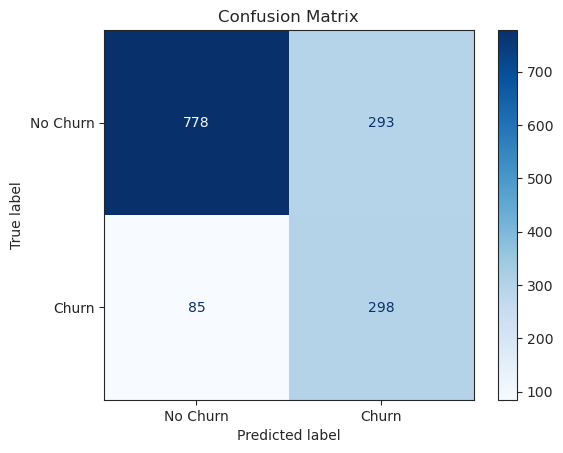

              precision    recall  f1-score   support

    No Churn       0.90      0.73      0.80      1071
       Churn       0.50      0.78      0.61       383

    accuracy                           0.74      1454
   macro avg       0.70      0.75      0.71      1454
weighted avg       0.80      0.74      0.75      1454



{'accuracy': 0.7400275103163686,
 'precision': 0.5042301184433164,
 'recall': 0.7780678851174935,
 'f1': 0.6119096509240246,
 'roc_auc': 0.8386966623028672}

In [135]:
evaluate_model(rf_clf, 'random_forest')

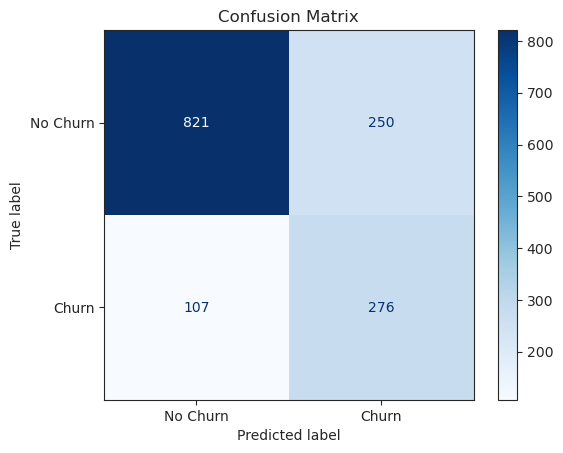

              precision    recall  f1-score   support

    No Churn       0.88      0.77      0.82      1071
       Churn       0.52      0.72      0.61       383

    accuracy                           0.75      1454
   macro avg       0.70      0.74      0.71      1454
weighted avg       0.79      0.75      0.77      1454



{'accuracy': 0.7544704264099037,
 'precision': 0.5247148288973384,
 'recall': 0.720626631853786,
 'f1': 0.6072607260726073,
 'roc_auc': 0.8229418834548614}

In [136]:
evaluate_model(dt_clf, 'decision_tree')

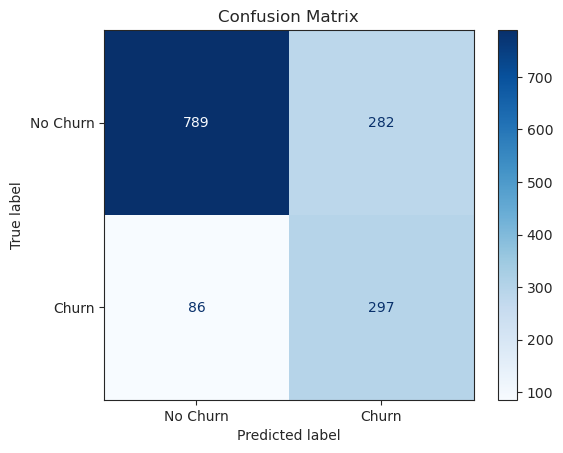

              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1071
       Churn       0.51      0.78      0.62       383

    accuracy                           0.75      1454
   macro avg       0.71      0.76      0.71      1454
weighted avg       0.80      0.75      0.76      1454



{'accuracy': 0.7469050894085282,
 'precision': 0.5129533678756477,
 'recall': 0.7754569190600522,
 'f1': 0.6174636174636174,
 'roc_auc': 0.842379075215813}

In [137]:
evaluate_model(log_clf, 'logistic_regression')

#### Considerations

The results show that the models' scorings stayed stable after dropping the irrelevant features, maintaining `Recall` metrics around 0.78 for `Random Forest` and `Logistic Regression` classifiers. 

The worst recall metric was from `Decision Tree`, so it will be the one chosen not to be exported in the end of this project.   

Now it's time we predict the churn probabilities for the current data, document and export the models.

## Predicting Current Data

Now it's time to predict churn for the current data

### Helper Functions

In [138]:
ModelName = Literal['random_forest', 'logistic_regression']
def predict_y(model_name: ModelName, x: pd.DataFrame, model_features: List[str]) -> tuple[pd.Series, pd.Series]:
    if model_name == 'random_forest':
        model = rf_clf
    else:
        model = log_clf
    
    prediction = model.predict(x[model_features])
    predict_proba = model.predict_proba(x[model_features])

    prediction = pd.Series(prediction)
    predict_proba = pd.Series(predict_proba[:, 1])

    return prediction, predict_proba


In [139]:
def concat_predictions(rf_prediction: pd.Series, rf_predict_proba: pd.Series,
                       log_prediction: pd.Series, log_predict_proba: pd.Series) -> pd.DataFrame:
    predictions = pd.DataFrame()
    predictions['rf_prediction'] = rf_prediction
    predictions['log_prediction'] = log_prediction
    predictions['rf_predict_proba'] = rf_predict_proba
    predictions['log_predict_proba'] = log_predict_proba
    return predictions
    

In [140]:
def classify_risk(row: pd.Series) -> str:
    prob = row['probability']
    cls = row['classification']
    row_label = ''

    if cls == 0.0:
        if prob < 0.2:
            row_label = 'No risk'
        elif prob < 0.4:
            row_label = 'Low risk'
        else:
            row_label = 'Moderate risk'
    
    elif cls == 0.5:
        if prob < 0.4:
            row_label = 'Low risk'
        elif prob < 0.6:
            row_label = 'Moderate risk'
        else:
            row_label = 'High risk'
    
    elif cls == 1.0:
        if prob < 0.6:
            row_label = 'Moderate risk'
        elif prob < 0.8:
            row_label = 'High risk'
        else:
            row_label = 'Very high risk'

    return row_label

In [141]:
def generalize_predictions(predictions: pd.DataFrame) -> pd.DataFrame:
    predictions['probability'] = predictions[['rf_predict_proba', 'log_predict_proba']].mean(axis=1)
    predictions['classification'] = predictions[['rf_prediction', 'log_prediction']].mean(axis=1)

    predictions['risk'] = predictions.apply(classify_risk, axis=1)
    risk_order = ['No risk', 'Low risk', 'Moderate risk', 'High risk', 'Very high risk']
    predictions['risk'] = pd.Categorical(predictions['risk'], categories=risk_order, ordered=True)

    predictions['risk %'] = (predictions['probability'] * 100).round(2)
    
    return predictions

In [142]:
def plot_result(predictions: pd.DataFrame, x: str, hue: str, title: str,
                xlabel: str, ylabel: str, fontsizes: str = 'medium', bins: int = 20, kde: bool = True,
                legend_labels: Optional[List[str]] = None, legend_title: Optional[str] = None) -> None:
    sns.histplot(data=predictions, x=x, hue=hue, bins=bins, kde=kde)
    label_plot(title=title, xlabel=xlabel, ylabel=ylabel, fontsizes=fontsizes)
    if legend_labels is not None and legend_title is not None:
        plt.legend(labels=legend_labels, title=legend_title); 
    plt_show_close()

### Predicting

In [143]:
# Columns needed for each model
rf_clf_features = final_datasets['random_forest']['train']['original']['x'].columns.to_list()
log_clf_features = final_datasets['logistic_regression']['train']['original']['x'].columns.to_list()

In [144]:
rf_prediction, rf_predict_proba = predict_y(model_name='random_forest', x=x, model_features=rf_clf_features) # type: ignore
log_prediction, log_predict_proba = predict_y(model_name='logistic_regression', x=x, model_features=log_clf_features) # type: ignore
predictions = concat_predictions(rf_prediction, rf_predict_proba, log_prediction, log_predict_proba)
predictions

,rf_prediction,log_prediction,rf_predict_proba,log_predict_proba
0,0.0,0.0,0.245258,0.305922
1,1.0,1.0,0.545210,0.590605
2,1.0,1.0,0.841934,0.831937
3,1.0,1.0,0.807799,0.819739
4,1.0,1.0,0.733610,0.825905
...,...,...,...,...
7262,0.0,0.0,0.122278,0.171430
7263,1.0,1.0,0.764342,0.767436
7264,1.0,1.0,0.710026,0.678914
7265,0.0,0.0,0.038208,0.050515


### Generalizing

To make the predictions palatable for stakeholders, some heuristics will be applied in models' predictions.  
2 new columns will be created, from which a percentage of risk and a risk label will be derived.  

The heuristics will be applied as follows:

1. A `probability` column will be created, containing the mean() value of both models' predict_proba().

    - A `risk %` column will be derived from `probability` * 100

2. A `classification` column will be created, containing the mean() value of both models' predict().

    - 1.0: Both models predicted churn.

    - 0.0: Both models predicted no churn.
    - 0.5: A model predicted churn and the other predicted no churn.

3. A `risk` column will label risk as ['No risk', 'Low risk', 'Moderate risk', 'High risk', 'Very high risk'], based on a cross evaluation of `probability` and `classification`.  

Refer to classify_risk() function for better understanding risk classification

In [145]:
predictions = generalize_predictions(predictions)
predictions


,rf_prediction,log_prediction,rf_predict_proba,log_predict_proba,probability,classification,risk,risk %
0,0.0,0.0,0.245258,0.305922,0.275590,0.0,Low risk,27.56
1,1.0,1.0,0.545210,0.590605,0.567908,1.0,Moderate risk,56.79
2,1.0,1.0,0.841934,0.831937,0.836936,1.0,Very high risk,83.69
3,1.0,1.0,0.807799,0.819739,0.813769,1.0,Very high risk,81.38
4,1.0,1.0,0.733610,0.825905,0.779758,1.0,High risk,77.98
...,...,...,...,...,...,...,...,...
7262,0.0,0.0,0.122278,0.171430,0.146854,0.0,No risk,14.69
7263,1.0,1.0,0.764342,0.767436,0.765889,1.0,High risk,76.59
7264,1.0,1.0,0.710026,0.678914,0.694470,1.0,High risk,69.45
7265,0.0,0.0,0.038208,0.050515,0.044362,0.0,No risk,4.44


In [146]:
classification_description = predictions['classification'].value_counts().reset_index()
classification_description.columns = ['Classification', 'Frequency']
classification_description['Description'] = classification_description['Classification'].map({0.0: 'Both models predict No Churn', 1.0: 'Both models predict Churn', 0.5: 'Ambiguous'})

   Classification  Frequency                   Description
0             0.0       4114  Both models predict No Churn
1             1.0       2688     Both models predict Churn
2             0.5        465                     Ambiguous


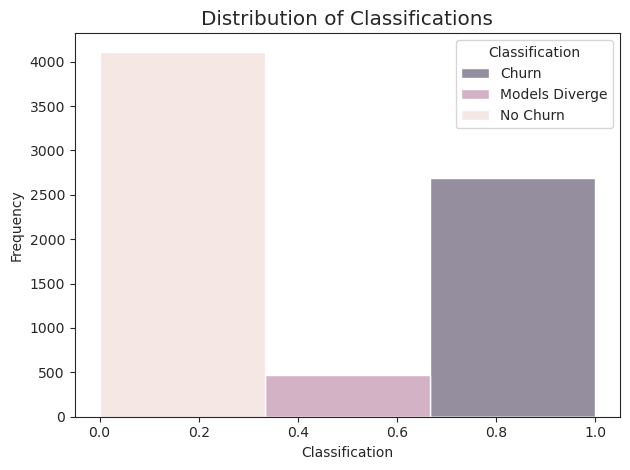

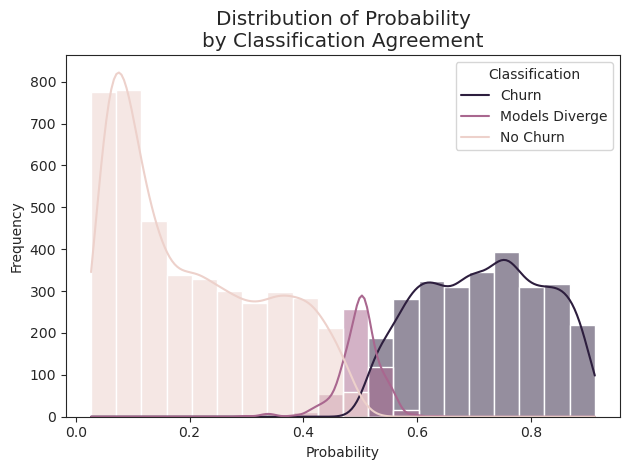

risk
No risk           2329
High risk         1539
Low risk          1358
Moderate risk     1344
Very high risk     697
Name: count, dtype: int64


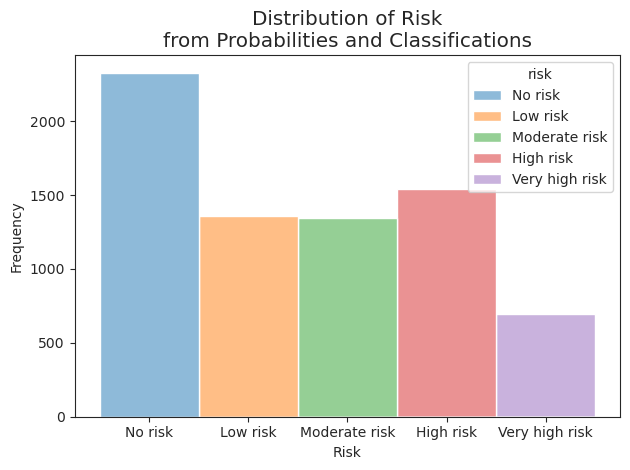

* Refer to classify_risk() function for better understanding risk classification


In [149]:
pprint(classification_description)

plot_result(predictions= predictions, x='classification', hue='classification',
            title='Distribution of Classifications',
            xlabel='Classification', ylabel='Frequency', bins=3, legend_title='Classification',
            legend_labels=['Churn', 'Models Diverge', 'No Churn'])

plot_result(predictions= predictions, x='probability', hue='classification',
            title='Distribution of Probability\nby Classification Agreement',
            xlabel='Probability', ylabel='Frequency', bins=20, legend_title='Classification',
            legend_labels=['Churn', 'Models Diverge', 'No Churn'])

print(predictions['risk'].value_counts())

plot_result(predictions= predictions, x='risk', hue='risk',
            title='Distribution of Risk\nfrom Probabilities and Classifications',
            xlabel='Risk', ylabel='Frequency', bins=5, kde=False)

print('* Refer to classify_risk() function for better understanding risk classification')

## Appending Predictions

Predictions will now be added to the original data from Telecom-X, next to the original `Churn` column.   

- Risk classification will be added as `ChurnRisk` column.

- Probability of churn will be added as `ChurnRisk_%` column.

In order to avoid visual pollution and bad interpretability, values for customers that have already churned in the original dataset will be transformed as follows:

- ChurnRisk = `Churn`

- ChurnRisk_% = `100.00`

In [ ]:
def move_column(df: pd.DataFrame, col_to_move: str, column_at_left: str) -> pd.DataFrame:
    """Move a column to a new position in the DataFrame."""
    cols = df.columns.tolist()
    position = cols.index(column_at_left) + 1
    cols.remove(col_to_move)
    cols.insert(position, col_to_move)
    return df[cols]

def mark_actual_churn(df: pd.DataFrame) -> pd.DataFrame:
    """Replace ChurnRisk and ChurnRisk_% for actual churned customers."""
    if 'Churn' not in df['ChurnRisk'].cat.categories:
        df['ChurnRisk'] = df['ChurnRisk'].cat.add_categories(['Churn'])
    churned_mask = df['Churn'] == 'Yes'
    df.loc[churned_mask, 'ChurnRisk'] = 'Churn'
    df.loc[churned_mask, 'ChurnRisk_%'] = 100
    
    return df

In [ ]:
def add_predictions(df: pd.DataFrame, predictions: pd.DataFrame) -> pd.DataFrame:
    """Add predictions to dataframe."""
    # Create new columns with predictions
    df['ChurnRisk'] = predictions['risk']
    df['ChurnRisk_%'] = predictions['risk %']

    # Move columns close to 'Churn'
    df = move_column(df=df, col_to_move='ChurnRisk', column_at_left='Churn')
    df = move_column(df=df, col_to_move='ChurnRisk_%', column_at_left='ChurnRisk')

    # Mark actual churn
    df = mark_actual_churn(df)
    
    return df

In [ ]:
df_final = add_predictions(df_original, predictions)
df_final

,CustomerID,Churn,ChurnRisk,ChurnRisk_%,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Daily,Demographics
0,0002-ORFBO,No,Low risk,27.36,Female,No,Yes,Yes,9,Yes,...,Yes,Yes,No,Anual,Yes,Mailed check,65.60,593.30,2.186667,PD
1,0003-MKNFE,No,Moderate risk,56.98,Male,No,No,No,9,Yes,...,No,No,Yes,Mensal,No,Mailed check,59.90,542.40,1.996667,Outros
2,0004-TLHLJ,Yes,Churn,100.00,Male,No,No,No,4,Yes,...,No,No,No,Mensal,Yes,Electronic check,73.90,280.85,2.463333,Outros
3,0011-IGKFF,Yes,Churn,100.00,Male,Yes,Yes,No,13,Yes,...,No,Yes,Yes,Mensal,Yes,Electronic check,98.00,1237.85,3.266667,PT
4,0013-EXCHZ,Yes,Churn,100.00,Female,Yes,Yes,No,3,Yes,...,Yes,Yes,No,Mensal,Yes,Mailed check,83.90,267.40,2.796667,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,No risk,14.56,Female,No,No,No,13,Yes,...,Yes,No,No,Anual,No,Mailed check,55.15,742.90,1.838333,Outros
7263,9992-RRAMN,Yes,Churn,100.00,Male,No,Yes,No,22,Yes,...,No,No,Yes,Mensal,Yes,Electronic check,85.10,1873.70,2.836667,P
7264,9992-UJOEL,No,High risk,69.63,Male,No,No,No,2,Yes,...,No,No,No,Mensal,Yes,Mailed check,50.30,92.75,1.676667,Outros
7265,9993-LHIEB,No,No risk,4.47,Male,No,Yes,Yes,67,Yes,...,Yes,No,Yes,Bianual,No,Mailed check,67.85,4627.65,2.261667,PD


### Exporting

In [ ]:
df_final.to_csv('TelecomX_Data_With_Predictions.csv', float_format='%.2f', index=False)

## Documenting Models

Now it is time to write documentations of the models.   

In [ ]:
model_specs = {
    'random_forest': {
        'Model': 'RandomForestClassifier',
        'Specifications': {
            'n_estimators': 100,
            'max_depth': 6,
            'min_samples_leaf': 5,
            'max_features': 'sqrt',
            'class_weight': 'balanced',
            'random_state': 42
        }
    },
    'logistic_regression': {
        'Model': 'LogisticRegression',
        'Specifications': {
            'C': 0.01,
            'penalty': 'l2',
            'solver': 'liblinear',
            'max_iter': 1000,
            'random_state': 42
        }
    }
}

In [ ]:
document_model(model=rf_clf, model_name='random_forest', model_features=rf_clf_features,
               x=final_datasets['random_forest']['train']['oversampled']['x'],
               y=final_datasets['random_forest']['train']['oversampled']['y'],
               model_specs=model_specs['random_forest'],
               output_format='.md')

Documentation for random_forest saved to model_documentation_random_forest.md


In [ ]:
document_model(model=log_clf, model_name='logistic_regression', model_features=log_clf_features,
               x=final_datasets['logistic_regression']['train']['oversampled']['x'],
               y=final_datasets['logistic_regression']['train']['oversampled']['y'],
               model_specs=model_specs['logistic_regression'],
               output_format='.md')

Documentation for logistic_regression saved to model_documentation_logistic_regression.md


## Exporting Models

As the last step, it is time to export the models for future usage.

In [ ]:
with open('random_forest_classifier.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

with open('logistic_regression_classifier.pkl', 'wb') as f:
    pickle.dump(log_clf, f)

### Testing exported model

In [ ]:
logistic_regression = pickle.load(open('logistic_regression_classifier.pkl', 'rb'))
random_forest = pickle.load(open('random_forest_classifier.pkl', 'rb'))

In [ ]:
pprint(logistic_regression.predict(final_datasets['logistic_regression']['test']['x'].head()))
pprint(logistic_regression.predict_proba(final_datasets['logistic_regression']['test']['x'].head()))

array([1., 0., 0., 0., 1.])
array([[0.16791331, 0.83208669],
       [0.90464427, 0.09535573],
       [0.77487028, 0.22512972],
       [0.81209128, 0.18790872],
       [0.04487577, 0.95512423]])


In [ ]:
pprint(random_forest.predict(final_datasets['random_forest']['test']['x'].head()))
pprint(random_forest.predict_proba(final_datasets['random_forest']['test']['x'].head()))

array([1., 0., 0., 0., 1.])
array([[0.22858926, 0.77141074],
       [0.77752411, 0.22247589],
       [0.72301396, 0.27698604],
       [0.69421904, 0.30578096],
       [0.13746054, 0.86253946]])


Works fine...

# Final Summary

### 📌 Executive Summary

This project aimed to perform a comprehensive analysis of Telecom-X's customer data to identify churn patterns and generate actionable insights through predictive modeling. Final deliverables include key business insights, well-documented machine learning models, and churn risk predictions to support the company’s strategic efforts in reducing customer attrition.  

The workflow progressed from descriptive analytics to advanced machine learning techniques, aligned with the project’s strategic objectives.

-----

### 📊 Project Overview

#### 🔍 Data Analytics Approach

- The **Exploratory Data Analysis (EDA)** phase provided a detailed overview of customer behavior through intuitive visualizations.

- The **Data Preprocessing** stage enriched the EDA by incorporating numerical insights and preparing the dataset for modeling through relevant transformations.

#### 🧠 Data Science Methodology

- After preprocessing, various models were evaluated in the **Cross-Validation** phase, where hyperparameters were tuned to optimize model performance.

- In the **Model Experimentation** phase, models were trained on the current dataset and evaluated using confusion matrices and metrics such as ROC-AUC and F1 Score. Particular emphasis was placed on Recall, to minimize false negatives.

- The **Model Refinement** phase focused on improving computational efficiency while preserving performance.

- In **Prediction Phase**, the top-performing models were used to generate churn risk predictions on current data, delivering actionable insights for Telecom-X's marketing and strategy teams.

- These predictions were then appended to the dataset in the **Appending Predictions** section.

- Models and decisions were thoroughly documented during the **Model Documentation** phase.

- Finally, in **Model Export**, the trained models were serialized and saved as binaries using pickle.

-----

### 🧩 Churn Prediction Pipeline Diagram

- **Start**
  - **Data Ingestion**
    - Load and organize raw customer data.
  - **Exploratory Data Analysis (EDA)**
    - Visualize trends and patterns in churn behavior.
  - **Data Preprocessing**
    - Feature transformation
    - Encoding categorical variables
    - Scaling numeric values
  - **Model Training & Evaluation**
    - Cross-validation
    - Hyperparameter tuning
    - Evaluate using ROC-AUC, F1 Score, Recall
  - **Model Selection & Refinement**
    - Choose best models based on performance
    - Improve computational efficiency
  - **Churn Risk Prediction**
    - Generate churn probability predictions
    - Post-process into risk categories
  - **Appending Predictions to Dataset**
    - Add `ChurnRisk_%` and `ChurnRisk` columns
  - **Model Documentation & Export**
    - Save models using `pickle`
    - Document modeling choices and decisions
  - **Delivery to Stakeholders**
    - Share insights and segment interpretations
    - Provide guide for practical use
- **End**


-----

### 📈 Model Performance Summary

| Model Name              | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
|-------------------------|----------|-----------|--------|----------|---------|
| Logistic Regression     |  0.75    |  0.51     |  0.78  |  0.62    |  0.84   |
| Random Forest           |  0.74    |  0.50     |  0.78  |  0.61    |  0.84   |
| Decision Tree           |  0.75    |  0.52     |  0.72  |  0.61    |  0.82   |

**Final Selected Models**

✅ Random Forest Classifier  
✅ Logistic Regression Classifier


-----

### 🧭 Predictions User Guide

To ensure predictions were easily interpretable by stakeholders, a post-processing heuristic was applied to the model outputs. This process involved the creation of two new columns reflecting the **risk probability** and **risk level**:

1. **Probability averaging:**

    - A new `probability` column was created by averaging churn probability scores from both models (Random Forest and Logistic Regression), aiming to reduce individual model bias.

    - A `ChurnRisk_%` column was derived by multiplying probability by 100.

2. **Classification Averaging:**

    - `1.0`: Both models predicted churn.

    - `0.0`: Both models predicted no churn.
    - `0.5`: A model predicted churn and the other predicted no churn.

3. **Risk Labeling:**

    - A final `ChurnRisk` column was generated by applying the `classify_risk()` heuristic, which maps combinations of `probability` and `classification` into the following categories: 
        - No risk, Low risk, Moderate risk, High risk, Very high risk

4. **Integration into Dataset:** 

    - Predictions were appended to the original data set at `Appending Predictions` section.

    - `ChurnRisk` for risk label

    - `ChurnRisk_%` for churn probability

⚠️ Note: For customers already labeled as churned in the original dataset:  

- `ChurnRisk` = Churn  

- `ChurnRisk_%` = 100.00

-----

### 🔑 Key Insights

The most influential features across all models, based on feature importance (tree-based), coefficient weights (logistic regression), and permutation scores, were:
- `Contract_Mensal`

- `Monthly`
- `Tenure`
- `InternetService_Fibra Ótica`
- `PaymentMethod_Electronic check`
- `Contract_Bianual`

These findings suggest churn behavior is primarily driven by pricing models, internet service type, electronic payment friction, and contract structure. In particular, fiber optic service and monthly contracts showed strong associations with higher churn rates.  

Telecom-X shall, therefore, deeply analyze one or more of the following factors:
- **Pricing policies**

- **Internet service quality**
- **User experience with electronic billing systems**
- **Contractual issues**, such as:
    - High early termination fees

    - Bureaucratic procedures
